# IPL Data EDA

About Data - The Indian Premier League (IPL) a professional Twenty20 cricket league in India usually
contested between March and May of every year by eight teams representing eight different
cities or states in India. The league was founded by the Board of Control for Cricket in India
(BCCI) in 2007. The IPL is the most-attended cricket league in the world and the brand value of
the IPL in 2019 was 475 billion (US$6.7 billion).

For analysis, we have two files:
- IPL Matches 2008-2020.csv which list the matches that took place from seasons 2008 till 2020.
- IPL Ball-by-Ball 2008-2020.csv which consist of details of each match ball by ball (bxb).

### IPL Matches 2008-2020.csv

Columns:
- id: Match Ids of the matches took place in each season.
- city: City where the Match was held
- date: Date of the match
- player_of_match: Name of player_of_match
- venue: Venu name which holds the city where the match is played.
- neutral_venue: Neutral venue is a stadium that is not the home ground of either side. [0 - Not a netutral Venue, 1 - Yes, its a neutral venue]
- team1: Team Name
- team2: Team Name
- toss_winner: Team who won the toss
- toss_decision: Toss decision either to bat or field
- winner: team who won the match
- result: Match won by runs or by wickets or if it was a tie. Nan values will be replaced by no_result value.
- result_margin: Won by how many runs/wickets
- eliminator: Wheather the match was an eliminator match or not.[Y and N are the values]
- method: The value for matches affected by weather will be marked as 'D/L', else NaN
- umpire1 and umpire2: are the umpires who served for the respective matches.

### IPL Ball-by-Ball 2008-2020.csv

Columns:
- id: Match Ids of the matches took place in each season.
- inning: 2 innings per match
- over: 20 Overs per innings
- ball: 6 ball per over. It can me more per over if there are no-ball or wides delivered.
- batsman: The batting player who stricked the ball delivered.
- non_striker: The non stricking batting player who was pairing with the stricker batting player.
- bowler: The player from fieldign team who delivers the ball of the over
- batsman_runs: Run scored by the batsman
- extra_runs: Runs credited to the batting team which is not a personal score but a team score via byes, wides, legbyes, noballs, and penalty
- total_runs: Sum total of batsman_runs and extra_runs for the batting team for that particular ball delivery
- non_boundary: 1 for boundary and 0 for not a boundary
- is_wicket: 1 for wicket and 0 for not a wicket
- dismissal_kind: How the wicket fell
- player_dismissed: Which batsmen wicket fell
- fielder: Who was the reason to get the wicket
- extras_type: Extra runs were given in the cases of byes, wides, legbyes, noballs, and as penalty.
- batting_team: The team who is batting
- bowling_team: The team who is fielding

# Loading Data Sets

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
matches = pd.read_csv("/content/IPL Matches 2008-2020.csv")

In [3]:
bxb = pd.read_csv("/content/IPL Ball-by-Ball 2008-2020.csv",on_bad_lines='skip')

# Summarizing the Data Sets

In [4]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [5]:
matches.describe()

,id,neutral_venue,result_margin
count,8.160000e+02,816.000000,799.000000
mean,7.563496e+05,0.094363,17.321652
std,3.058943e+05,0.292512,22.068427
min,3.359820e+05,0.000000,1.000000
25%,5.012278e+05,0.000000,6.000000
50%,7.292980e+05,0.000000,8.000000
75%,1.082626e+06,0.000000,19.500000
max,1.237181e+06,1.000000,146.000000


In [6]:
matches.describe(include='object')

,city,date,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,eliminator,method,umpire1,umpire2
count,803,816,812,816,816,816,816,816,812,812,812,19,816,816
unique,32,596,233,36,15,15,15,2,15,3,2,1,48,47
top,Mumbai,2014-05-11,AB de Villiers,Eden Gardens,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Mumbai Indians,wickets,N,D/L,HDPK Dharmasena,S Ravi
freq,101,2,23,77,108,106,106,496,120,435,799,19,78,84


In [7]:
bxb.info()
#1,93,468 total records

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193468 entries, 0 to 193467
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                193468 non-null  int64 
 1   inning            193468 non-null  int64 
 2   over              193468 non-null  int64 
 3   ball              193468 non-null  int64 
 4   batsman           193468 non-null  object
 5   non_striker       193468 non-null  object
 6   bowler            193468 non-null  object
 7   batsman_runs      193468 non-null  int64 
 8   extra_runs        193468 non-null  int64 
 9   total_runs        193468 non-null  int64 
 10  non_boundary      193468 non-null  int64 
 11  is_wicket         193468 non-null  int64 
 12  dismissal_kind    9495 non-null    object
 13  player_dismissed  9495 non-null    object
 14  fielder           6784 non-null    object
 15  extras_type       10233 non-null   object
 16  batting_team      193468 non-null  obj

In [8]:
bxb.describe()

,id,inning,over,ball,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket
count,1.934680e+05,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000
mean,7.567688e+05,1.482131,9.177027,3.615967,1.240231,0.066414,1.306645,0.000083,0.049078
std,3.060971e+05,0.499682,5.676848,1.807128,1.610867,0.339991,1.598802,0.009094,0.216031
min,3.359820e+05,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.012270e+05,1.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.292970e+05,1.000000,9.000000,4.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,1.082628e+06,2.000000,14.000000,5.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.237181e+06,2.000000,19.000000,9.000000,6.000000,7.000000,7.000000,1.000000,1.000000


In [9]:
bxb.describe(include='object')

,batsman,non_striker,bowler,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
count,193468,193468,193468,9495,9495,6784,10233,193468,193277
unique,537,530,420,9,506,879,5,15,15
top,V Kohli,S Dhawan,Harbhajan Singh,caught,RG Sharma,MS Dhoni,wides,Mumbai Indians,Mumbai Indians
freq,4609,4593,3451,5743,167,164,5858,24466,24453


# Understanding the dataset

## *Lets check if the Match ids of both the data set matches. This will help us to confirm the data integrity.*

In [10]:
matches.id.unique().size

816

In [11]:
bxb.id.unique().size

816

In [12]:
id_matches_ = set(matches.id)
id_bxb_ = set(bxb.id)
id_matches_==id_bxb_

True

### **INFERENCE**:

There is no integrity issues between the match ids of Matches and Deliveries (ball by ball) dataset.

## Checking column values of Matches Dataset

In [13]:
matches.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [14]:
matches.neutral_venue.unique()

array([0, 1])

In [15]:
matches.result.unique()

array(['runs', 'wickets', 'tie', nan], dtype=object)

In [16]:
matches.eliminator.unique()

array(['N', 'Y', nan], dtype=object)

In [17]:
matches.method.value_counts()

method
D/L    19
Name: count, dtype: int64

In [18]:
bxb.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


## *Lets check if all matches played both innings or not.*

In [19]:
innings1_ = bxb[bxb.inning==1]['id'].unique()
innings2_ = bxb[bxb.inning==2]['id'].unique()
set(innings1_).difference(set(innings2_))

{501265, 829763}

### **INFERENCE**:

Matches 501265, 829763 played only the first INNINGS.

## Checking column values of Deliveries Dataset

In [20]:
sorted(bxb.over.unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

20 overs played per innings.

In [21]:
sorted(bxb.ball.unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9]

6 balls per over has gone up to 9 balls due to wides/noballs.

In [22]:
sorted(bxb.extra_runs.unique())

[0, 1, 2, 3, 4, 5, 7]

Extra runs claimed by Batting team on account of reasons listed in column extras_type. Lets check them.

In [23]:
bxb[bxb.extra_runs.isin([1,2,3,4,5,7])]['extras_type'].unique()

array(['byes', 'wides', 'legbyes', 'noballs', 'penalty'], dtype=object)

In [24]:
bxb[bxb.extra_runs==1]['extras_type'].unique()
#1,2,3

array(['wides', 'legbyes', 'noballs', 'byes'], dtype=object)

In [25]:
bxb[bxb.extra_runs==4]['extras_type'].unique()

array(['byes', 'legbyes', 'wides'], dtype=object)

In [26]:
bxb[bxb.extra_runs==5]['extras_type'].unique()

array(['wides', 'penalty', 'noballs', 'legbyes', 'byes'], dtype=object)

In [27]:
bxb[bxb.extra_runs==7]['extras_type'].unique()

array(['penalty'], dtype=object)

In [28]:
#bxb[(bxb.extra_runs==7)&(bxb.extras_type=='penalty')]
bxb[(bxb.extra_runs==7)]



,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
98262,729309,2,4,2,M Vijay,Q de Kock,SL Malinga,0,7,7,0,0,NaN,NaN,NaN,penalty,Delhi Daredevils,Mumbai Indians


### *Note: No wides or noballs were thrown but the over is having an extra ball.*

In [29]:
#bxb[(bxb.id==729309)&(bxb.inning==2)&(bxb.over==4)]['ball'].unique()
#bxb[(bxb.id==729309)&(bxb.inning==2)&(bxb.over==4)]['extras_type'].value_counts()
bxb[(bxb.id==729309)&(bxb.inning==2)&(bxb.over==4)]


,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
98261,729309,2,4,1,Q de Kock,M Vijay,SL Malinga,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Daredevils,Mumbai Indians
98262,729309,2,4,2,M Vijay,Q de Kock,SL Malinga,0,7,7,0,0,NaN,NaN,NaN,penalty,Delhi Daredevils,Mumbai Indians
98263,729309,2,4,3,Q de Kock,M Vijay,SL Malinga,0,0,0,0,0,NaN,NaN,NaN,NaN,Delhi Daredevils,Mumbai Indians
98264,729309,2,4,4,Q de Kock,M Vijay,SL Malinga,0,0,0,0,0,NaN,NaN,NaN,NaN,Delhi Daredevils,Mumbai Indians
98265,729309,2,4,5,Q de Kock,M Vijay,SL Malinga,0,0,0,0,0,NaN,NaN,NaN,NaN,Delhi Daredevils,Mumbai Indians
98266,729309,2,4,6,Q de Kock,M Vijay,SL Malinga,0,0,0,0,0,NaN,NaN,NaN,NaN,Delhi Daredevils,Mumbai Indians
98267,729309,2,4,7,Q de Kock,M Vijay,SL Malinga,0,0,0,0,0,NaN,NaN,NaN,NaN,Delhi Daredevils,Mumbai Indians


When there is a wide ball or no-ball thrown, extra ball is given in that over

**But in this case, no wides or noballs were thrown but the over is having an extra ball!!!**


## Checking column values of Deliveries Dataset contd...

In [30]:
bxb.non_boundary.unique()

array([0, 1])

In [31]:
bxb.is_wicket.unique()

array([0, 1])

In [32]:
bxb.dismissal_kind.unique()

array([nan, 'caught', 'run out', 'bowled', 'lbw', 'retired hurt',
       'stumped', 'caught and bowled', 'hit wicket',
       'obstructing the field'], dtype=object)

In [33]:
matches.isna().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

In [34]:
bxb.isna().sum()

id                       0
inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               0
total_runs               0
non_boundary             0
is_wicket                0
dismissal_kind      183973
player_dismissed    183973
fielder             186684
extras_type         183235
batting_team             0
bowling_team           191
dtype: int64

# Pre Processing of Data Sets

## *Handling Missing Values of Matches Dataset*

In [35]:
matches[matches['city'].isna()]['venue'].unique()

array(['Sharjah Cricket Stadium', 'Dubai International Cricket Stadium'],
      dtype=object)

Missing City details can be filled by checking the corresponding Venue details and checking from the dataset what are the cities in the venue.

In [36]:
matches[matches['venue']=='Sharjah Cricket Stadium']['city'].unique()

array([nan, 'Sharjah'], dtype=object)

In [37]:
matches[matches['venue']=='Dubai International Cricket Stadium']['city'].unique()

array([nan, 'Dubai'], dtype=object)

**INFERENCE**:

Its evident now that Missing city corresponding to Venue Sharjah Cricket Stadium is Sharjah.

Similarly, Missing city corresponding to Venue Dubai International Cricket Stadium is Dubai.

In [38]:
df_matches = matches.copy()

In [39]:
df_matches['city'] = np.where(df_matches['venue']=='Sharjah Cricket Stadium','Sharjah',df_matches['city'])

In [40]:
df_matches['city'] = np.where(df_matches['venue']=='Dubai International Cricket Stadium','Dubai',df_matches['city'])

In [41]:
df_matches['city'].isna().sum()

0

Now lets check the city names for any value integrity issue.

In [42]:
city_set = set(df_matches['city'])
city_set

{'Abu Dhabi',
 'Ahmedabad',
 'Bangalore',
 'Bengaluru',
 'Bloemfontein',
 'Cape Town',
 'Centurion',
 'Chandigarh',
 'Chennai',
 'Cuttack',
 'Delhi',
 'Dharamsala',
 'Dubai',
 'Durban',
 'East London',
 'Hyderabad',
 'Indore',
 'Jaipur',
 'Johannesburg',
 'Kanpur',
 'Kimberley',
 'Kochi',
 'Kolkata',
 'Mumbai',
 'Nagpur',
 'Port Elizabeth',
 'Pune',
 'Raipur',
 'Rajkot',
 'Ranchi',
 'Sharjah',
 'Visakhapatnam'}

**Bangalore and Bengaluru** are representing the same city and need to be addressing as Bengaluru as its the latest name of the city.

In [43]:
df_matches.replace(to_replace='Bangalore', value='Bengaluru', inplace=True)

In [44]:
df_matches['player_of_match'] = df_matches['player_of_match'].fillna('no_player_of_match')

Now lets check the venue names for any value integrity issue.

In [45]:
venue_set = set(df_matches['venue'])
venue_set

{'Barabati Stadium',
 'Brabourne Stadium',
 'Buffalo Park',
 'De Beers Diamond Oval',
 'Dr DY Patil Sports Academy',
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
 'Dubai International Cricket Stadium',
 'Eden Gardens',
 'Feroz Shah Kotla',
 'Green Park',
 'Himachal Pradesh Cricket Association Stadium',
 'Holkar Cricket Stadium',
 'JSCA International Stadium Complex',
 'Kingsmead',
 'M Chinnaswamy Stadium',
 'M.Chinnaswamy Stadium',
 'MA Chidambaram Stadium, Chepauk',
 'Maharashtra Cricket Association Stadium',
 'Nehru Stadium',
 'New Wanderers Stadium',
 'Newlands',
 'OUTsurance Oval',
 'Punjab Cricket Association IS Bindra Stadium, Mohali',
 'Punjab Cricket Association Stadium, Mohali',
 'Rajiv Gandhi International Stadium, Uppal',
 'Sardar Patel Stadium, Motera',
 'Saurashtra Cricket Association Stadium',
 'Sawai Mansingh Stadium',
 'Shaheed Veer Narayan Singh International Stadium',
 'Sharjah Cricket Stadium',
 'Sheikh Zayed Stadium',
 "St George's Park",
 'Subrata Roy Sa

**'M Chinnaswamy Stadium' and 'M.Chinnaswamy Stadium'** refers same stadium so we will now have only 'M.Chinnaswamy Stadium'

Similarly **'Punjab Cricket Association IS Bindra Stadium, Mohali' and 'Punjab Cricket Association Stadium, Mohali'** refers same stadium and we will keep 'Punjab Cricket Association IS Bindra Stadium, Mohali'.

In [46]:
df_matches['venue'] = np.where(df_matches['venue']=='M Chinnaswamy Stadium','M.Chinnaswamy Stadium',df_matches['venue'])


In [47]:
df_matches['venue'] = np.where(df_matches['venue']=='Punjab Cricket Association Stadium, Mohali','Punjab Cricket Association IS Bindra Stadium, Mohali',df_matches['venue'])

Checking the Team Names as well for integrity issues.

In [48]:
#who are the teams from 2008 till 2020
team1_set = set(df_matches['team1'])
team2_set = set(df_matches['team2'])
teams = team1_set.union(team2_set)

In [49]:
teams

{'Chennai Super Kings',
 'Deccan Chargers',
 'Delhi Capitals',
 'Delhi Daredevils',
 'Gujarat Lions',
 'Kings XI Punjab',
 'Kochi Tuskers Kerala',
 'Kolkata Knight Riders',
 'Mumbai Indians',
 'Pune Warriors',
 'Rajasthan Royals',
 'Rising Pune Supergiant',
 'Rising Pune Supergiants',
 'Royal Challengers Bangalore',
 'Sunrisers Hyderabad'}

**'Delhi Capitals' and 'Delhi Daredevils'** represent the same Team and hence we will keep the team name as Delhi Capitals.

Similarly, **'Rising Pune Supergiant' and 'Rising Pune Supergiants'** represents the same team and we will keep Rising Pune Supergiant

In [50]:
df_matches.replace(to_replace='Delhi Daredevils', value='Delhi Capitals', inplace=True)

In [51]:
df_matches.replace(to_replace='Rising Pune Supergiants', value='Rising Pune Supergiant', inplace=True)

In [52]:
df_matches.replace(to_replace='Royal Challengers Bangalore', value='Royal Challengers Bengaluru', inplace=True)

In [53]:
df_matches[df_matches['winner'].isna()]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
241,501265,Delhi,2011-05-21,no_player_of_match,Feroz Shah Kotla,0,Delhi Capitals,Pune Warriors,Delhi Capitals,bat,NaN,NaN,NaN,NaN,NaN,SS Hazare,RJ Tucker
486,829763,Bengaluru,2015-04-29,no_player_of_match,M.Chinnaswamy Stadium,0,Royal Challengers Bengaluru,Rajasthan Royals,Rajasthan Royals,field,NaN,NaN,NaN,NaN,NaN,JD Cloete,PG Pathak
511,829813,Bengaluru,2015-05-17,no_player_of_match,M.Chinnaswamy Stadium,0,Royal Challengers Bengaluru,Delhi Capitals,Royal Challengers Bengaluru,field,NaN,NaN,NaN,NaN,NaN,HDPK Dharmasena,K Srinivasan
744,1178424,Bengaluru,2019-04-30,no_player_of_match,M.Chinnaswamy Stadium,0,Royal Challengers Bengaluru,Rajasthan Royals,Rajasthan Royals,field,NaN,NaN,NaN,NaN,NaN,UV Gandhe,NJ Llong


In [54]:
no_result = df_matches[df_matches['winner'].isna()]['id'].unique()

In [55]:
no_result

array([ 501265,  829763,  829813, 1178424])

In [56]:
bxb[bxb['id'].isin(no_result)]['id'].value_counts()

id
829813     130
829763     128
501265      63
1178424     51
Name: count, dtype: int64

**INFERENCE**:

We can see that the Match Ids having Nan values for winner columns do have reference in Deliveries(Ball By Ball) Data and hence cannot drop them.

So will replace the Nan values and keep those records.

In [57]:
df_matches['winner'] = df_matches['winner'].fillna('no_winner')

In [58]:
df_matches['result'].unique()

array(['runs', 'wickets', 'tie', nan], dtype=object)

In [59]:
df_matches['result'] = df_matches['result'].fillna('no_result')

In [60]:
df_matches['result_margin'].unique()

array([140.,  33.,   9.,   5.,   6.,   3.,  66.,   7.,  10.,   4.,  13.,
        45.,   8.,  29.,  18.,  23.,  41.,  12.,  65.,  25.,   1.,  14.,
       105.,  19.,  75.,  92.,  11.,  24.,  nan,  27.,  38.,  78.,  16.,
        53.,   2.,  31.,  55.,  98.,  34.,  36.,  39.,  17.,  40.,  67.,
        63.,  37.,  57.,  35.,  22.,  21.,  48.,  26.,  20.,  85.,  32.,
        76., 111.,  82.,  43.,  58.,  28.,  74.,  42.,  59.,  46.,  47.,
        86.,  44.,  87., 130.,  15.,  60.,  77.,  30.,  50.,  93.,  72.,
        62.,  97., 138.,  71., 144.,  80.,  51.,  61., 146.,  64., 102.,
       118.,  49.,  88.,  69.])

In [61]:
df_matches['result_margin'] = df_matches['result_margin'].fillna(0.0)

In [62]:
df_matches['eliminator'].unique()

array(['N', 'Y', nan], dtype=object)

In [63]:
df_matches['eliminator'] = df_matches['eliminator'].fillna('no_eliminator')

In [64]:
df_matches['method'].unique()

array([nan, 'D/L'], dtype=object)

In [65]:
df_matches['method'] = df_matches['method'].fillna('no_method')

Checking the names of Umpires for any data integrity issues.

In [66]:
umpire1_ = set(df_matches.umpire1)
umpire2_ = set(df_matches.umpire2)
umpires = umpire1_.union(umpire2_)

In [67]:
umpires

{'A Deshmukh',
 'A Nand Kishore',
 'AK Chaudhary',
 'AL Hill',
 'AM Saheba',
 'AV Jayaprakash',
 'AY Dandekar',
 'Aleem Dar',
 'Asad Rauf',
 'BF Bowden',
 'BG Jerling',
 'BNJ Oxenford',
 'BR Doctrove',
 'C Shamshuddin',
 'CB Gaffaney',
 'CK Nandan',
 'DJ Harper',
 'GA Pratapkumar',
 'GAV Baxter',
 'HDPK Dharmasena',
 'I Shivram',
 'IJ Gould',
 'IL Howell',
 'JD Cloete',
 'K Bharatan',
 'K Hariharan',
 'K Srinath',
 'K Srinivasan',
 'KN Ananthapadmanabhan',
 'M Erasmus',
 'MR Benson',
 'NJ Llong',
 'Nitin Menon',
 'PG Pathak',
 'PR Reiffel',
 'RB Tiffin',
 'RE Koertzen',
 'RJ Tucker',
 'RK Illingworth',
 'RM Deshpande',
 'S Asnani',
 'S Das',
 'S Ravi',
 'SD Fry',
 'SD Ranade',
 'SJ Davis',
 'SJA Taufel',
 'SK Tarapore',
 'SL Shastri',
 'SS Hazare',
 'Subroto Das',
 'TH Wijewardene',
 'UV Gandhe',
 'VA Kulkarni',
 'VK Sharma',
 'YC Barde'}

**INFERENCE**:
Umpire names are free of correction, hence we can leave it as it is.

In [68]:
df_matches.isna().sum()
#Good to go as all Missing Data Handled.

id                 0
city               0
date               0
player_of_match    0
venue              0
neutral_venue      0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
result             0
result_margin      0
eliminator         0
method             0
umpire1            0
umpire2            0
dtype: int64

In [69]:
df_matches[df_matches.duplicated()]
#No duplicates

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2


In [70]:
cleaned_m = df_matches.copy()

## *Handling Missing Values of Deliveries(Ball by Ball) Dataset*

In [71]:
bxb['dismissal_kind'].unique()

array([nan, 'caught', 'run out', 'bowled', 'lbw', 'retired hurt',
       'stumped', 'caught and bowled', 'hit wicket',
       'obstructing the field'], dtype=object)

In [72]:
df_bxb = bxb.copy()

In [73]:
df_bxb['dismissal_kind'] = df_bxb['dismissal_kind'].fillna('no_dismissal')

In [74]:
df_bxb['player_dismissed'] = df_bxb['player_dismissed'].fillna('no_player_dismissed')

In [75]:
df_bxb['fielder'] = df_bxb['fielder'].fillna('no_fielder')

In [76]:
df_bxb['extras_type'].unique()

array([nan, 'byes', 'wides', 'legbyes', 'noballs', 'penalty'],
      dtype=object)

In [77]:
df_bxb['extras_type'] = df_bxb['extras_type'].fillna('no_extras_type')

Before handling the missing value of the column bowling_team, lets correct the team names as we did for the Matches Dataset.

In [78]:
df_bxb.replace(to_replace='Delhi Daredevils', value='Delhi Capitals', inplace=True)

In [79]:
df_bxb.replace(to_replace='Rising Pune Supergiants', value='Rising Pune Supergiant', inplace=True)

In [80]:
df_bxb.replace(to_replace='Royal Challengers Bangalore', value='Royal Challengers Bengaluru', inplace=True)

In [81]:
df_bxb[df_bxb['bowling_team'].isna()]

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
57048,501265,1,0,1,NV Ojha,DA Warner,AC Thomas,1,0,1,0,0,no_dismissal,no_player_dismissed,no_fielder,no_extras_type,Delhi Capitals,NaN
57049,501265,1,0,2,DA Warner,NV Ojha,AC Thomas,0,1,1,0,0,no_dismissal,no_player_dismissed,no_fielder,legbyes,Delhi Capitals,NaN
57050,501265,1,1,1,DA Warner,NV Ojha,JP Faulkner,0,1,1,0,0,no_dismissal,no_player_dismissed,no_fielder,legbyes,Delhi Capitals,NaN
57051,501265,1,1,2,NV Ojha,DA Warner,JP Faulkner,0,0,0,0,0,no_dismissal,no_player_dismissed,no_fielder,no_extras_type,Delhi Capitals,NaN
57052,501265,1,1,3,NV Ojha,DA Warner,JP Faulkner,0,0,0,0,0,no_dismissal,no_player_dismissed,no_fielder,no_extras_type,Delhi Capitals,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115654,829763,1,7,3,AB de Villiers,Mandeep Singh,STR Binny,0,0,0,0,0,no_dismissal,no_player_dismissed,no_fielder,no_extras_type,Royal Challengers Bengaluru,NaN
115655,829763,1,8,6,AB de Villiers,Mandeep Singh,SR Watson,2,0,2,0,0,no_dismissal,no_player_dismissed,no_fielder,no_extras_type,Royal Challengers Bengaluru,NaN
115656,829763,1,9,1,Mandeep Singh,AB de Villiers,STR Binny,4,0,4,0,0,no_dismissal,no_player_dismissed,no_fielder,no_extras_type,Royal Challengers Bengaluru,NaN
115657,829763,1,8,4,AB de Villiers,Mandeep Singh,SR Watson,0,0,0,0,0,no_dismissal,no_player_dismissed,no_fielder,no_extras_type,Royal Challengers Bengaluru,NaN


INFERENCE:

As we can see Bating team column is having the Team name and only bowling Team data is missing which can be filled from the matches dataset.

So lets check the Match Ids for which the Bowling Team data is not available in the deliveries dataset.

In [82]:
#df_matches[df_matches['id']==829763]
match_id = df_bxb[df_bxb['bowling_team'].isna()]['id'].unique()
match_id

array([501265, 829763])

In [83]:
df_matches[df_matches['id'].isin(match_id)][['id','team1','team2']]

,id,team1,team2
241,501265,Delhi Capitals,Pune Warriors
486,829763,Royal Challengers Bengaluru,Rajasthan Royals


In [84]:
df_bxb[df_bxb['bowling_team'].isna()]['batting_team'].value_counts()

batting_team
Royal Challengers Bengaluru    128
Delhi Capitals                  63
Name: count, dtype: int64

In [85]:
df_bxb[(df_bxb['bowling_team'].isna())&(df_bxb['batting_team'].isin(['Delhi Capitals']))].shape


(63, 18)

In [86]:
df_bxb[(df_bxb['bowling_team'].isna())&(df_bxb['batting_team'].isin(['Royal Challengers Bengaluru']))].shape


(128, 18)

In [87]:
df_bxb['bowling_team'].value_counts()


bowling_team
Mumbai Indians                 24453
Royal Challengers Bengaluru    23024
Delhi Capitals                 22731
Kolkata Knight Riders          22583
Kings XI Punjab                22457
Chennai Super Kings            21224
Rajasthan Royals               18972
Sunrisers Hyderabad            14703
Deccan Chargers                 9039
Pune Warriors                   5394
Rising Pune Supergiant          3543
Gujarat Lions                   3540
Kochi Tuskers Kerala            1614
Name: count, dtype: int64

**INFERENCE**:

Rajasthan Royals               18972

Pune Warriors                   5394

**bowling_team NaN values to be replaced with Rajasthan Royals if batting_team is Royal Challengers Bengaluru and with Pune Warriors if batting_team is Delhi Capitals as per the match id foreing key replationship between Matches and Deliveries dataset.**

**The Teams are**

**Delhi Capitals	- Pune Warriors**

**Royal Challengers Bengaluru - Rajasthan Royals**

Delhi Capitals 63
Royal Challengers Bengaluru 128

**After handling missing value, value count of Pune Warriors should increase by 63 and Rajasthan Royals should increase by 128**

In [88]:
df_bxb['bowling_team'] = np.where((df_bxb['bowling_team'].isna())&(df_bxb['batting_team'].isin(['Royal Challengers Bengaluru'])),'Rajasthan Royals',df_bxb['bowling_team'])

In [89]:
df_bxb['bowling_team'] = np.where((df_bxb['bowling_team'].isna())&(df_bxb['batting_team'].isin(['Delhi Capitals'])),'Pune Warriors',df_bxb['bowling_team'])

In [90]:
df_bxb['bowling_team'].value_counts()

bowling_team
Mumbai Indians                 24453
Royal Challengers Bengaluru    23024
Delhi Capitals                 22731
Kolkata Knight Riders          22583
Kings XI Punjab                22457
Chennai Super Kings            21224
Rajasthan Royals               19100
Sunrisers Hyderabad            14703
Deccan Chargers                 9039
Pune Warriors                   5457
Rising Pune Supergiant          3543
Gujarat Lions                   3540
Kochi Tuskers Kerala            1614
Name: count, dtype: int64

In [91]:
df_bxb.isna().sum()
#Good to go as all Missing Data Handled.

id                  0
inning              0
over                0
ball                0
batsman             0
non_striker         0
bowler              0
batsman_runs        0
extra_runs          0
total_runs          0
non_boundary        0
is_wicket           0
dismissal_kind      0
player_dismissed    0
fielder             0
extras_type         0
batting_team        0
bowling_team        0
dtype: int64

In [92]:
df_bxb[df_bxb.duplicated()]

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
38372,419152,1,3,1,SR Tendulkar,C Madan,PJ Sangwan,1,0,1,0,0,no_dismissal,no_player_dismissed,no_fielder,no_extras_type,Mumbai Indians,Delhi Capitals


In [93]:
cleaned_b = df_bxb.copy()

In [94]:
cleaned_b.drop_duplicates(inplace=True)

In [95]:
cleaned_b = cleaned_b.reset_index(drop=True)

In [96]:
cleaned_b.info()#193467

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193467 entries, 0 to 193466
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                193467 non-null  int64 
 1   inning            193467 non-null  int64 
 2   over              193467 non-null  int64 
 3   ball              193467 non-null  int64 
 4   batsman           193467 non-null  object
 5   non_striker       193467 non-null  object
 6   bowler            193467 non-null  object
 7   batsman_runs      193467 non-null  int64 
 8   extra_runs        193467 non-null  int64 
 9   total_runs        193467 non-null  int64 
 10  non_boundary      193467 non-null  int64 
 11  is_wicket         193467 non-null  int64 
 12  dismissal_kind    193467 non-null  object
 13  player_dismissed  193467 non-null  object
 14  fielder           193467 non-null  object
 15  extras_type       193467 non-null  object
 16  batting_team      193467 non-null  obj

## *Handling Date Field*

In [97]:
cleaned_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             816 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  816 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           816 non-null    object 
 11  result           816 non-null    object 
 12  result_margin    816 non-null    float64
 13  eliminator       816 non-null    object 
 14  method           816 non-null    object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [98]:
date_conv = pd.to_datetime(cleaned_m['date'], errors='coerce')

In [99]:
date_conv.isna().any()
#Conversion without any NaT(Not a Time) values

False

In [100]:
cleaned_m['date'] = pd.to_datetime(cleaned_m['date'], errors='coerce')

In [101]:
cleaned_m.dtypes

id                          int64
city                       object
date               datetime64[ns]
player_of_match            object
venue                      object
neutral_venue               int64
team1                      object
team2                      object
toss_winner                object
toss_decision              object
winner                     object
result                     object
result_margin             float64
eliminator                 object
method                     object
umpire1                    object
umpire2                    object
dtype: object

In [102]:
#Extracting the season from Date
season = cleaned_m['date'].dt.year

In [103]:
season

0      2008
1      2008
2      2008
3      2008
4      2008
       ... 
811    2020
812    2020
813    2020
814    2020
815    2020
Name: date, Length: 816, dtype: int32

In [104]:
#Inserting the column season at index 3 (position 4)
cleaned_m.insert(3,'season',season)

In [105]:
cleaned_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               816 non-null    int64         
 1   city             816 non-null    object        
 2   date             816 non-null    datetime64[ns]
 3   season           816 non-null    int32         
 4   player_of_match  816 non-null    object        
 5   venue            816 non-null    object        
 6   neutral_venue    816 non-null    int64         
 7   team1            816 non-null    object        
 8   team2            816 non-null    object        
 9   toss_winner      816 non-null    object        
 10  toss_decision    816 non-null    object        
 11  winner           816 non-null    object        
 12  result           816 non-null    object        
 13  result_margin    816 non-null    float64       
 14  eliminator       816 non-null    object   

In [106]:
cleaned_m.head()

,id,city,date,season,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bengaluru,2008-04-18,2008,BB McCullum,M.Chinnaswamy Stadium,0,Royal Challengers Bengaluru,Kolkata Knight Riders,Royal Challengers Bengaluru,field,Kolkata Knight Riders,runs,140.0,N,no_method,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,2008,MEK Hussey,"Punjab Cricket Association IS Bindra Stadium, ...",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,no_method,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,2008,MF Maharoof,Feroz Shah Kotla,0,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,wickets,9.0,N,no_method,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,2008,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bengaluru,Mumbai Indians,bat,Royal Challengers Bengaluru,wickets,5.0,N,no_method,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,2008,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,no_method,BF Bowden,K Hariharan


# EDA Questions and Answers

## Q1 - What was the count of matches played in each season?

In [107]:
matches_season = pd.DataFrame(cleaned_m['season'].value_counts())


In [108]:
matches_season

,count
season,
2013,76
2012,74
2011,73
2010,60
2014,60
2016,60
2018,60
2019,60
2020,60


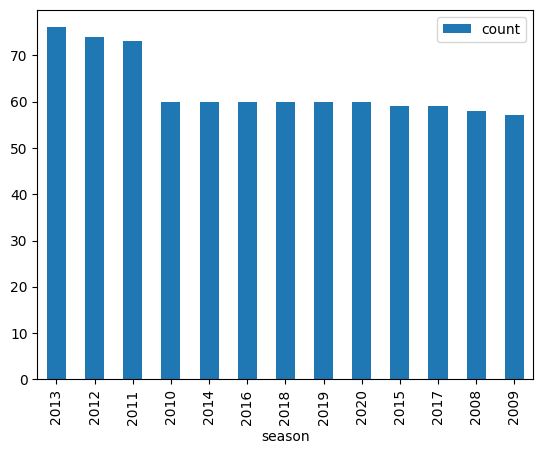

In [109]:
matches_season.plot(kind='bar')
plt.show()

### INFERENCE:

Highest number of matches were played in 2013 season and the lowest number of matches played in 2009 season.

## Q2 - How many runs were scored in each season?

In [110]:
cleaned_b['season'] = 0

In [249]:
#populating column season to deliveries data set by navigating the 816
#match ids from Matches dataset
for i in cleaned_m['id']:
  season_ = cleaned_m[cleaned_m['id']==i]['season']
  cleaned_b['season'] = np.where(cleaned_b['id']==i,season_,cleaned_b['season'])

Season value is only present in Matches dataset, to have the season data in deliveries dataset, checking the season for each matchid from the Matches dataset and copying that value to the deliveries dataset where the match ids matches.

In [112]:
#cleaned_b.head()
#335982 - 2008

#cleaned_b.tail()
#1237181 - 2020

cleaned_m[cleaned_m['id'].isin([335982,1237181])][['id','season']]
#result verified

,id,season
0,335982,2008
815,1237181,2020


In [113]:
run_season = pd.DataFrame(cleaned_b.groupby('season')['total_runs'].sum())

In [114]:
run_season

,total_runs
season,
2008,17937
2009,16320
2010,18863
2011,21154
2012,22453
2013,22541
2014,18909
2015,18332
2016,18862


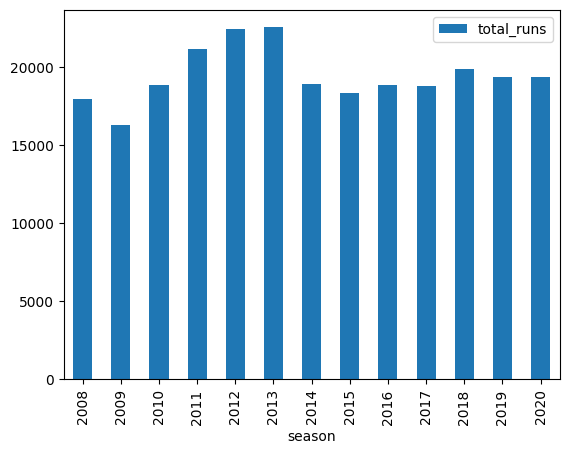

In [115]:
run_season.plot(kind='bar')
plt.show()

### INFERENCE:

Highest score of total runs belong to 2013 season and the lowest score of total runs belong to 2009 season. This synchornises with the seasons having highest number of matches and lowest number of matches.

## Q3 - What were the runs scored per match in different seasons?

In [116]:
cleaned_b.groupby(['season','id'])['total_runs'].sum().reset_index()

,season,id,total_runs
0,2008,335982,304
1,2008,335983,447
2,2008,335984,261
3,2008,335985,331
4,2008,335986,222
...,...,...,...
811,2020,1216547,402
812,2020,1237177,343
813,2020,1237178,263
814,2020,1237180,361


## Q4 - Who has umpired the most?

In [117]:
umpire_list = list(cleaned_m['umpire1']) + list(cleaned_m['umpire2'])

In [250]:
#creating the list of umpires and counting their presence
umpire_count_list = []
for i in set(umpire_list):
  umpire_count_list.append([i,umpire_list.count(i)])

In [119]:
umpire_count_list

[['BR Doctrove', 42],
 ['GA Pratapkumar', 6],
 ['SK Tarapore', 31],
 ['Nitin Menon', 57],
 ['HDPK Dharmasena', 94],
 ['K Srinath', 15],
 ['A Nand Kishore', 25],
 ['VK Sharma', 26],
 ['K Hariharan', 21],
 ['SD Ranade', 2],
 ['A Deshmukh', 12],
 ['SJ Davis', 7],
 ['K Bharatan', 3],
 ['GAV Baxter', 7],
 ['Asad Rauf', 51],
 ['RK Illingworth', 31],
 ['KN Ananthapadmanabhan', 33],
 ['RJ Tucker', 46],
 ['BG Jerling', 17],
 ['RB Tiffin', 30],
 ['BF Bowden', 37],
 ['AM Saheba', 26],
 ['UV Gandhe', 8],
 ['BNJ Oxenford', 48],
 ['I Shivram', 6],
 ['JD Cloete', 17],
 ['MR Benson', 12],
 ['C Shamshuddin', 82],
 ['S Das', 15],
 ['AL Hill', 6],
 ['SJA Taufel', 55],
 ['M Erasmus', 65],
 ['IL Howell', 14],
 ['DJ Harper', 27],
 ['NJ Llong', 37],
 ['TH Wijewardene', 5],
 ['K Srinivasan', 6],
 ['S Ravi', 121],
 ['CK Nandan', 57],
 ['SD Fry', 6],
 ['PR Reiffel', 24],
 ['Subroto Das', 1],
 ['Aleem Dar', 38],
 ['SL Shastri', 14],
 ['SS Hazare', 17],
 ['CB Gaffaney', 47],
 ['RM Deshpande', 7],
 ['PG Pathak', 1

In [251]:
#function to sort values in list based on the second value of each list item
def sortSecond(val):
    return val[1]
umpire_count_list.sort(key=sortSecond,reverse=True)

In [121]:
umpire_count_list

[['S Ravi', 121],
 ['HDPK Dharmasena', 94],
 ['AK Chaudhary', 87],
 ['C Shamshuddin', 82],
 ['M Erasmus', 65],
 ['Nitin Menon', 57],
 ['CK Nandan', 57],
 ['SJA Taufel', 55],
 ['Asad Rauf', 51],
 ['VA Kulkarni', 50],
 ['BNJ Oxenford', 48],
 ['CB Gaffaney', 47],
 ['RJ Tucker', 46],
 ['BR Doctrove', 42],
 ['RE Koertzen', 41],
 ['Aleem Dar', 38],
 ['BF Bowden', 37],
 ['NJ Llong', 37],
 ['KN Ananthapadmanabhan', 33],
 ['SK Tarapore', 31],
 ['RK Illingworth', 31],
 ['RB Tiffin', 30],
 ['S Asnani', 30],
 ['AY Dandekar', 28],
 ['DJ Harper', 27],
 ['VK Sharma', 26],
 ['AM Saheba', 26],
 ['A Nand Kishore', 25],
 ['PR Reiffel', 24],
 ['K Hariharan', 21],
 ['YC Barde', 19],
 ['BG Jerling', 17],
 ['JD Cloete', 17],
 ['SS Hazare', 17],
 ['K Srinath', 15],
 ['S Das', 15],
 ['IL Howell', 14],
 ['SL Shastri', 14],
 ['A Deshmukh', 12],
 ['MR Benson', 12],
 ['PG Pathak', 11],
 ['UV Gandhe', 8],
 ['SJ Davis', 7],
 ['GAV Baxter', 7],
 ['RM Deshpande', 7],
 ['GA Pratapkumar', 6],
 ['I Shivram', 6],
 ['AL Hi

### INFERENCE:

S Ravi is the umpire who served the entire seasons the most, 121 times.

## *Toss Statistics*

## Q8 - Does winning the toss imply winning the game?

In [122]:
toss_winner_wins = cleaned_m[cleaned_m['toss_winner']==cleaned_m['winner']].shape[0]
toss_winner_wins

418

In [123]:
toss_winner_loss = cleaned_m[cleaned_m['toss_winner']!=cleaned_m['winner']].shape[0]
toss_winner_loss

398

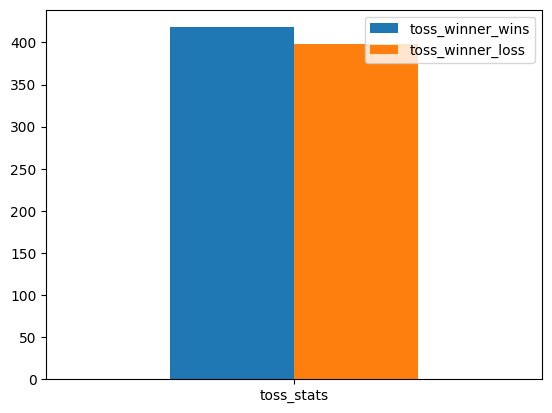

In [124]:
toss_stat_ = {'toss_winner_wins':toss_winner_wins,
             'toss_winner_loss':toss_winner_loss}
pd.DataFrame(toss_stat_,index=['toss_stats']).plot(kind='bar')
#to handle the x label orientation
plt.xticks(rotation=0)
plt.show()

### INFERENCE:

From the graph its evident that toss winners does have a lead in winning the match.


## Lets now see the toss statistics per season.

In [125]:
cleaned_m['toss_stat'] = 0
cleaned_m['toss_stat'] = np.where((cleaned_m['toss_winner']==cleaned_m['winner']),1,cleaned_m['toss_stat'])

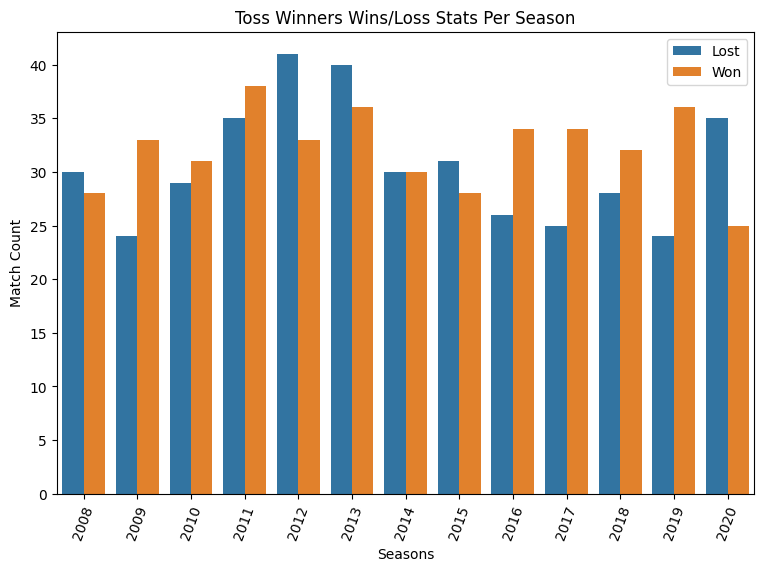

In [126]:
plt.figure(figsize=(9,6))
sns.countplot(x='season', data=cleaned_m, hue='toss_stat')
plt.xticks(rotation=70)
plt.xlabel('Seasons')
plt.ylabel('Match Count')
plt.title('Toss Winners Wins/Loss Stats Per Season')
plt.legend(['Lost','Won'])
plt.show()

### INFERENCE:

In the 13 seasons from 2008 till 2020, Toss Winners Won mostly (7 seasons).

2014 season shows no advantage of winning the toss as the toss decision had only 50% of chance on the winning.

The remaining 5 seasons showed the decison made by the toss winning team did not help them win the match.

## Q6 - What does the team decide after winning the toss?

In [127]:
cleaned_m['toss_decision'].value_counts()

toss_decision
field    496
bat      320
Name: count, dtype: int64

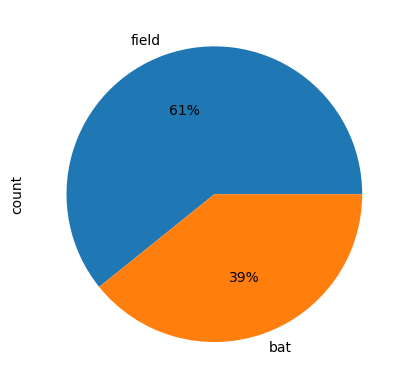

In [128]:
cleaned_m['toss_decision'].value_counts().plot(kind='pie', y='Toss Decision', autopct='%1.0f%%')
plt.show()

### INFERENCE:

Across the season, Toss winners tend to choose Fielding over bating.

Lets see the toss decision over season.

## Q7 - How does the toss decision vary across seasons?

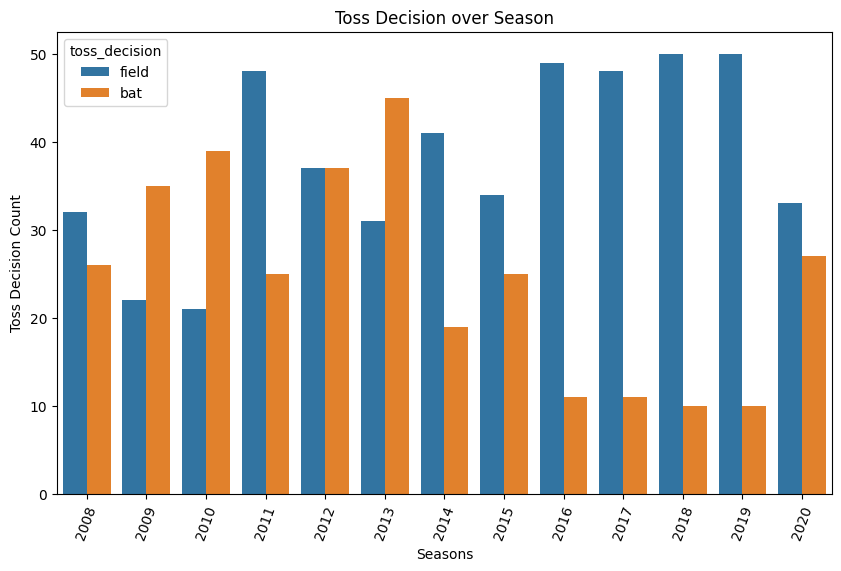

In [129]:
plt.figure(figsize=(10,6))
sns.countplot(x='season', data=cleaned_m, hue='toss_decision')
plt.xticks(rotation=70)
plt.xlabel('Seasons')
plt.ylabel('Toss Decision Count')
plt.title('Toss Decision over Season')
plt.show()

### INFERENCE:

Since 2008 till 2014, majority decision to Bat or Field fluctuated. Seasons 2008 and 2011 marked majority for Fielding but Seasons 2009, 2010 and 2013 showed up for Batting.

2012 season toss winners decision was in such a way that half of the entire match of the season went with Fielding while the rest half of the match went with Batting.

But from 2014 season we can see most of the toss decision was to FIELD.

## Toss Decision Stats of Toss Winners who won the Match

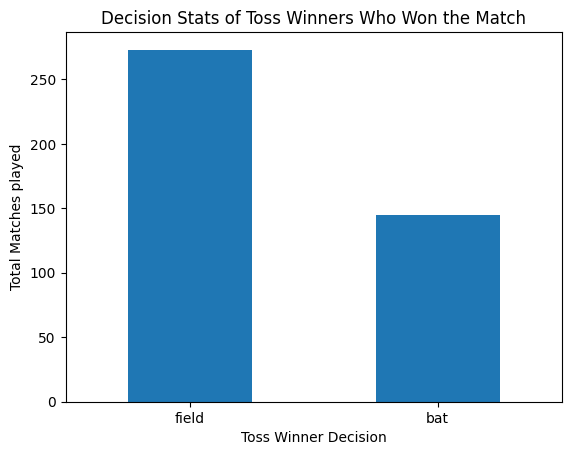

In [130]:
cleaned_m[cleaned_m['toss_winner']==cleaned_m['winner']]['toss_decision'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel('Toss Winner Decision')
plt.ylabel('Total Matches played')
plt.title('Decision Stats of Toss Winners Who Won the Match')
plt.show()

### INFERENCE:

Majority of the toss winners who won the match chose to FIELD.

## Lets now check the Share of the Toss Decision on the Victory.

In [131]:
cleaned_m.groupby(['toss_decision','toss_stat'])['id'].count()

toss_decision  toss_stat
bat            0            175
               1            145
field          0            223
               1            273
Name: id, dtype: int64

In [132]:
bat_won = cleaned_m[(cleaned_m['toss_stat']==1)&(cleaned_m['toss_decision'].isin(['bat']))].shape[0]
#bat_won


In [133]:
field_won = cleaned_m[(cleaned_m['toss_stat']==1)&(cleaned_m['toss_decision'].isin(['field']))].shape[0]
#field_won

In [134]:
total_win = cleaned_m[cleaned_m['toss_stat']==1].shape[0]
total_win

418

In [135]:
bat_won_p = (bat_won/total_win)*100
bat_won_p

34.688995215311

In [ ]:
field_won_p = (field_won/total_win)*100
field_won_p

In [137]:
pie_data = {'BAT':bat_won_p,
            'FIELD':field_won_p}

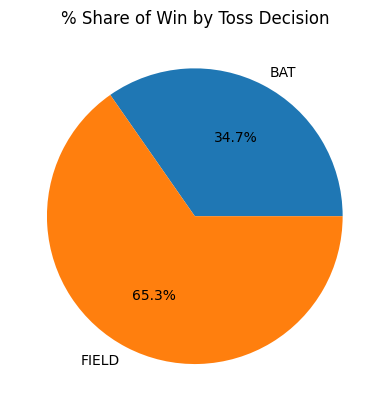

In [138]:
plt.pie([x*100 for x in pie_data.values()],labels=[x for x in pie_data.keys()],autopct='%0.1f%%')
plt.title('% Share of Win by Toss Decision')
plt.show()

### INFERENCE:

65.3% of the Toss winners chose to Field while the remaining 34.7% chose to bat.

## Q9 - How many times has the chasing team (Team who batted in the 2nd Innings) won the match?

In [139]:
cleaned_m[(cleaned_m['toss_decision']=='field')&(cleaned_m['toss_winner']==cleaned_m['winner'])].shape

(273, 19)

### INFERENCE:

273 times, the team who did batting in the second innings (chasing the score), won the match.

## *Team Performance*

In [140]:
team1 = set(cleaned_m.team1)
team2 = set(cleaned_m.team2)
teams_ = team1.union(team2)

In [141]:
teams_

{'Chennai Super Kings',
 'Deccan Chargers',
 'Delhi Capitals',
 'Gujarat Lions',
 'Kings XI Punjab',
 'Kochi Tuskers Kerala',
 'Kolkata Knight Riders',
 'Mumbai Indians',
 'Pune Warriors',
 'Rajasthan Royals',
 'Rising Pune Supergiant',
 'Royal Challengers Bengaluru',
 'Sunrisers Hyderabad'}

In [142]:
cleaned_b['batting_team'].unique().size

13

In [143]:
cleaned_b['bowling_team'].unique().size

13

### INFERENCE:

These are the 13 teams who played the seasons as per the dataset.



## Lets check TEAM presence over the seasons.

In [144]:
season_t = cleaned_m.season.unique()

In [252]:
#for each season, taking out unique values of batting team values from deliveries dataset
for i in season_t:
  teams_played = sorted(cleaned_b[cleaned_b['season']==i]['batting_team'].unique())
  print('Season: ',i,' Total teams: ',len(teams_played))
  #print('\n',np.array(teams_played))
  print('\n')
  for n, val in enumerate(teams_played):
    n += 1
    print (n, ". ",val)
  print('\n\n---------------------------')

Season:  2008  Total teams:  8


1 .  Chennai Super Kings
2 .  Deccan Chargers
3 .  Delhi Capitals
4 .  Kings XI Punjab
5 .  Kolkata Knight Riders
6 .  Mumbai Indians
7 .  Rajasthan Royals
8 .  Royal Challengers Bengaluru


---------------------------
Season:  2009  Total teams:  8


1 .  Chennai Super Kings
2 .  Deccan Chargers
3 .  Delhi Capitals
4 .  Kings XI Punjab
5 .  Kolkata Knight Riders
6 .  Mumbai Indians
7 .  Rajasthan Royals
8 .  Royal Challengers Bengaluru


---------------------------
Season:  2010  Total teams:  8


1 .  Chennai Super Kings
2 .  Deccan Chargers
3 .  Delhi Capitals
4 .  Kings XI Punjab
5 .  Kolkata Knight Riders
6 .  Mumbai Indians
7 .  Rajasthan Royals
8 .  Royal Challengers Bengaluru


---------------------------
Season:  2011  Total teams:  10


1 .  Chennai Super Kings
2 .  Deccan Chargers
3 .  Delhi Capitals
4 .  Kings XI Punjab
5 .  Kochi Tuskers Kerala
6 .  Kolkata Knight Riders
7 .  Mumbai Indians
8 .  Pune Warriors
9 .  Rajasthan Royals
10 .  Roy

## **Q11 - Which team has played the most number of matches?**

In [146]:
team_list = list(cleaned_m['team1'])+list(cleaned_m['team2'])

In [147]:
team_match_count_list = []
for i in set(team_list):
  team_match_count_list.append([i,team_list.count(i)])

In [148]:
team_match_count_list

[['Rising Pune Supergiant', 30],
 ['Kings XI Punjab', 190],
 ['Rajasthan Royals', 161],
 ['Deccan Chargers', 75],
 ['Pune Warriors', 46],
 ['Gujarat Lions', 30],
 ['Kolkata Knight Riders', 192],
 ['Mumbai Indians', 203],
 ['Chennai Super Kings', 178],
 ['Kochi Tuskers Kerala', 14],
 ['Delhi Capitals', 194],
 ['Royal Challengers Bengaluru', 195],
 ['Sunrisers Hyderabad', 124]]

In [149]:
def sortSecond(val):
    return val[1]
team_match_count_list.sort(key=sortSecond, reverse=True)

In [150]:
team_match_count_list

[['Mumbai Indians', 203],
 ['Royal Challengers Bengaluru', 195],
 ['Delhi Capitals', 194],
 ['Kolkata Knight Riders', 192],
 ['Kings XI Punjab', 190],
 ['Chennai Super Kings', 178],
 ['Rajasthan Royals', 161],
 ['Sunrisers Hyderabad', 124],
 ['Deccan Chargers', 75],
 ['Pune Warriors', 46],
 ['Rising Pune Supergiant', 30],
 ['Gujarat Lions', 30],
 ['Kochi Tuskers Kerala', 14]]

### INFERENCE:


Mumbai Indians played the most matches (203 matches) from season 2008 till 2020.

## Q13 - Which team has the highest winning percentage?

In [151]:
df_team_match_count = pd.DataFrame(team_match_count_list,columns=['Team','Matches_Played'])

In [152]:
df_team_match_count

,Team,Matches_Played
0,Mumbai Indians,203
1,Royal Challengers Bengaluru,195
2,Delhi Capitals,194
3,Kolkata Knight Riders,192
4,Kings XI Punjab,190
5,Chennai Super Kings,178
6,Rajasthan Royals,161
7,Sunrisers Hyderabad,124
8,Deccan Chargers,75
9,Pune Warriors,46


In [153]:
df_team_match_count['Matches_Won'] = 0
for i in df_team_match_count['Team']:
  match_count = cleaned_m[cleaned_m['winner']==i].shape[0]
  df_team_match_count['Matches_Won'] = np.where(df_team_match_count['Team']==i,match_count,df_team_match_count['Matches_Won'])
  #print(i)

In [154]:
df_team_match_count

,Team,Matches_Played,Matches_Won
0,Mumbai Indians,203,120
1,Royal Challengers Bengaluru,195,91
2,Delhi Capitals,194,86
3,Kolkata Knight Riders,192,99
4,Kings XI Punjab,190,88
5,Chennai Super Kings,178,106
6,Rajasthan Royals,161,81
7,Sunrisers Hyderabad,124,66
8,Deccan Chargers,75,29
9,Pune Warriors,46,12


In [155]:
df_team_match_count['Winning_Percentage'] = (df_team_match_count['Matches_Won']/df_team_match_count['Matches_Played'])*100

In [156]:
df_winning_percentage = df_team_match_count.sort_values(by='Winning_Percentage',ascending=False)

In [157]:
df_winning_percentage

,Team,Matches_Played,Matches_Won,Winning_Percentage
5,Chennai Super Kings,178,106,59.550562
0,Mumbai Indians,203,120,59.113300
7,Sunrisers Hyderabad,124,66,53.225806
3,Kolkata Knight Riders,192,99,51.562500
6,Rajasthan Royals,161,81,50.310559
10,Rising Pune Supergiant,30,15,50.000000
1,Royal Challengers Bengaluru,195,91,46.666667
4,Kings XI Punjab,190,88,46.315789
2,Delhi Capitals,194,86,44.329897
11,Gujarat Lions,30,13,43.333333


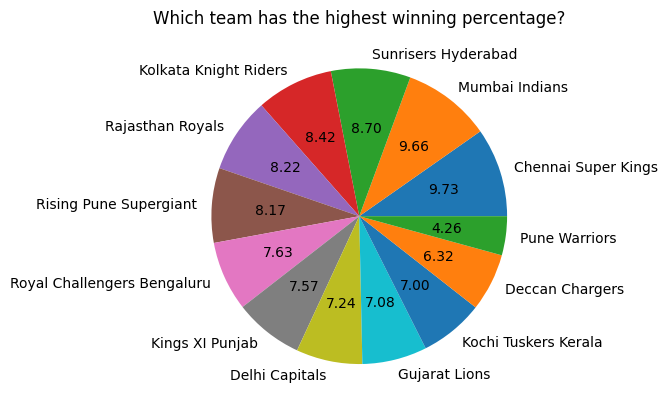

In [160]:
plt.pie([x*100 for x in df_winning_percentage['Winning_Percentage']],labels=[x for x in df_winning_percentage['Team']],autopct='%0.2f')
plt.title('Which team has the highest winning percentage?')
plt.show()

### INFERENCE:

Chennai Super Kings had the heighest winning percentage (59.550562 %) which is also clearly depicted in PIE chart.

## Q5 - Which team has won the most tosses?

In [159]:
toss_winning_team = cleaned_m.groupby('toss_winner')['id'].count().sort_values(ascending=False)

In [161]:
toss_winning_team

toss_winner
Mumbai Indians                 106
Delhi Capitals                 100
Kolkata Knight Riders           98
Chennai Super Kings             97
Rajasthan Royals                87
Royal Challengers Bengaluru     87
Kings XI Punjab                 85
Sunrisers Hyderabad             57
Deccan Chargers                 43
Pune Warriors                   20
Gujarat Lions                   15
Rising Pune Supergiant          13
Kochi Tuskers Kerala             8
Name: id, dtype: int64

<Axes: title={'center': 'Toss Winners and their Frequency'}, ylabel='toss_winner'>

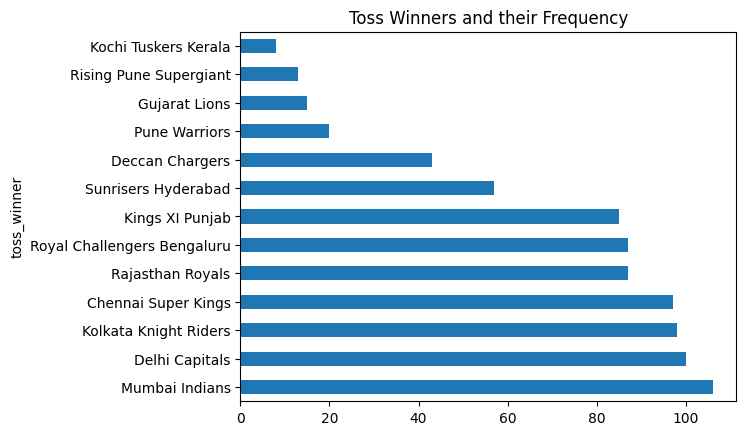

In [162]:
toss_winning_team.plot(kind='barh',title='Toss Winners and their Frequency')


### INFERENCE:

**Mumbai Indians won toss the maximum number of times from 2008 till 2020 seasons.**

Lets check the winners per season and who won the most of the seasons from 2008 till 2020.

## Q12 - Which team has won the most number of time

In [163]:
winning_team = cleaned_m.groupby('winner')['id'].count().sort_values(ascending=False)

In [164]:
winning_team

winner
Mumbai Indians                 120
Chennai Super Kings            106
Kolkata Knight Riders           99
Royal Challengers Bengaluru     91
Kings XI Punjab                 88
Delhi Capitals                  86
Rajasthan Royals                81
Sunrisers Hyderabad             66
Deccan Chargers                 29
Rising Pune Supergiant          15
Gujarat Lions                   13
Pune Warriors                   12
Kochi Tuskers Kerala             6
no_winner                        4
Name: id, dtype: int64

<Axes: title={'center': 'Match Winners and their Frequency'}, ylabel='winner'>

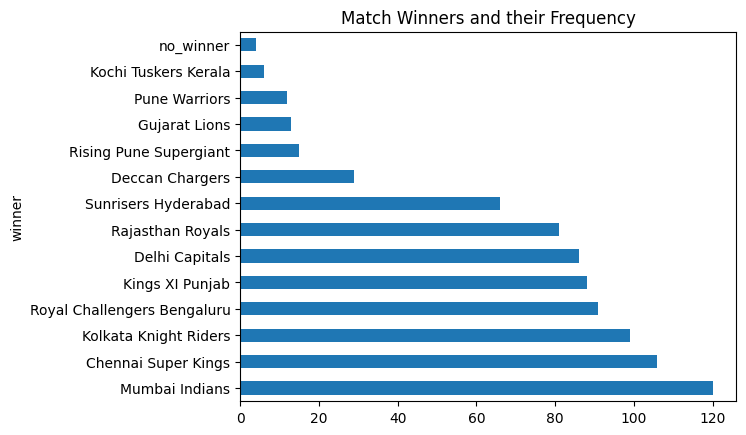

In [165]:
winning_team.plot(kind='barh',title='Match Winners and their Frequency')


### INFERENCE:

Mumbai Indians won the maximum number of matches (120 matches) played in the seasons from 2008 till 2020.

no_match cases are those matches which were not played fully due to weather issues or any other reasons.

**Lets now check winners by season.**

## Q10 - Which all teams had won this tournament?

In [166]:
#Approach 1
#this approach will not help to further work on the results obtained.
for i in season_t:
  winner = cleaned_m[cleaned_m['season']==i].tail(1)['winner'].to_string(index=False)
  print('\n Season: ',i,' Winner: ',winner)


 Season:  2008  Winner:  Rajasthan Royals

 Season:  2009  Winner:  Deccan Chargers

 Season:  2010  Winner:  Chennai Super Kings

 Season:  2011  Winner:  Chennai Super Kings

 Season:  2012  Winner:  Kolkata Knight Riders

 Season:  2013  Winner:  Mumbai Indians

 Season:  2014  Winner:  Kolkata Knight Riders

 Season:  2015  Winner:  Mumbai Indians

 Season:  2016  Winner:  Sunrisers Hyderabad

 Season:  2017  Winner:  Mumbai Indians

 Season:  2018  Winner:  Chennai Super Kings

 Season:  2019  Winner:  Mumbai Indians

 Season:  2020  Winner:  Mumbai Indians


In [167]:
#Approach 2
#this approach will help to work further on the results obtained.
match_season = set(cleaned_m.season)

In [168]:
match_season_df = pd.DataFrame(sorted(match_season), columns=['season'])

In [169]:
match_season_df['winner']=np.NaN
for i in season_t:
  winner = cleaned_m[cleaned_m['season']==i].tail(1)['winner'].to_string(index=False)
  match_season_df['winner'] = np.where(match_season_df['season']==i,winner,match_season_df['winner'])


In [170]:
match_season_df

,season,winner
0,2008,Rajasthan Royals
1,2009,Deccan Chargers
2,2010,Chennai Super Kings
3,2011,Chennai Super Kings
4,2012,Kolkata Knight Riders
5,2013,Mumbai Indians
6,2014,Kolkata Knight Riders
7,2015,Mumbai Indians
8,2016,Sunrisers Hyderabad
9,2017,Mumbai Indians


## Teams who won more seasons from 2008 - 2020

In [171]:
match_season_df['winner'].value_counts()

winner
Mumbai Indians           5
Chennai Super Kings      3
Kolkata Knight Riders    2
Rajasthan Royals         1
Deccan Chargers          1
Sunrisers Hyderabad      1
Name: count, dtype: int64

<Axes: title={'center': 'Teams who won more Seasons'}, xlabel='number of season', ylabel='winner'>

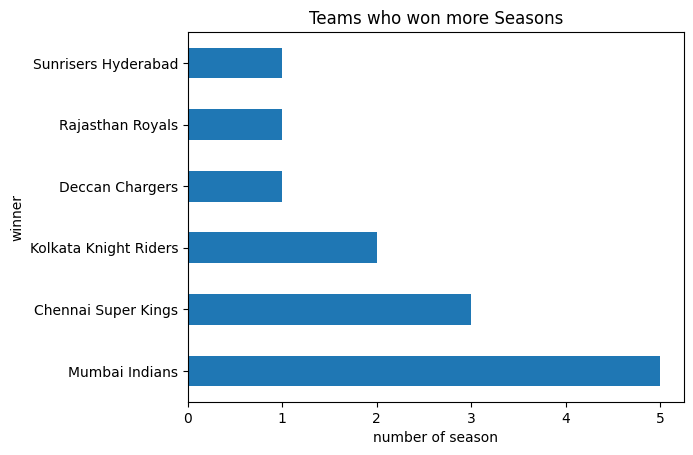

In [172]:
match_season_df.groupby('winner')['season'].count().sort_values(ascending=False).plot(kind='barh',title='Teams who won more Seasons',xlabel='number of season')

### INFERENCE:

Mumbai Indians won more seasons (5 seasons) from 2008 till 2020.

## Q14 - Is there any lucky venue for a particular team?

In [173]:
cleaned_m.head(2)

,id,city,date,season,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,toss_stat
0,335982,Bengaluru,2008-04-18,2008,BB McCullum,M.Chinnaswamy Stadium,0,Royal Challengers Bengaluru,Kolkata Knight Riders,Royal Challengers Bengaluru,field,Kolkata Knight Riders,runs,140.0,N,no_method,Asad Rauf,RE Koertzen,0
1,335983,Chandigarh,2008-04-19,2008,MEK Hussey,"Punjab Cricket Association IS Bindra Stadium, ...",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,no_method,MR Benson,SL Shastri,1


In [174]:
df_team_venue = cleaned_m.groupby(['winner','venue'])['id'].count().reset_index()
df_team_venue

,winner,venue,id
0,Chennai Super Kings,Brabourne Stadium,1
1,Chennai Super Kings,Buffalo Park,1
2,Chennai Super Kings,De Beers Diamond Oval,1
3,Chennai Super Kings,Dr DY Patil Sports Academy,3
4,Chennai Super Kings,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,2
...,...,...,...
225,Sunrisers Hyderabad,Sheikh Zayed Stadium,2
226,Sunrisers Hyderabad,Subrata Roy Sahara Stadium,1
227,Sunrisers Hyderabad,Wankhede Stadium,1
228,no_winner,Feroz Shah Kotla,1


In [176]:
# Delete all rows with column 'winner' having value 'no_winner'
index_no_winner = df_team_venue[df_team_venue['winner']=='no_winner'].index
df_team_venue.drop(index_no_winner , inplace=True)
df_team_venue

,winner,venue,id
0,Chennai Super Kings,Brabourne Stadium,1
1,Chennai Super Kings,Buffalo Park,1
2,Chennai Super Kings,De Beers Diamond Oval,1
3,Chennai Super Kings,Dr DY Patil Sports Academy,3
4,Chennai Super Kings,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,2
...,...,...,...
223,Sunrisers Hyderabad,Shaheed Veer Narayan Singh International Stadium,1
224,Sunrisers Hyderabad,Sharjah Cricket Stadium,2
225,Sunrisers Hyderabad,Sheikh Zayed Stadium,2
226,Sunrisers Hyderabad,Subrata Roy Sahara Stadium,1


In [177]:
df_team_venue.rename(columns={'id':'match_count'}, inplace=True)

In [178]:
df_team_venue_sorted = df_team_venue.groupby('winner').apply(
      lambda x: x.sort_values(['match_count'],ascending = False)
      ).reset_index(drop = True)

In [179]:
df_team_venue_sorted

,winner,venue,match_count
0,Chennai Super Kings,"MA Chidambaram Stadium, Chepauk",40
1,Chennai Super Kings,Wankhede Stadium,7
2,Chennai Super Kings,Dubai International Cricket Stadium,6
3,Chennai Super Kings,Feroz Shah Kotla,6
4,Chennai Super Kings,Maharashtra Cricket Association Stadium,5
...,...,...,...
223,Sunrisers Hyderabad,Saurashtra Cricket Association Stadium,1
224,Sunrisers Hyderabad,"Sardar Patel Stadium, Motera",1
225,Sunrisers Hyderabad,JSCA International Stadium Complex,1
226,Sunrisers Hyderabad,Green Park,1


In [180]:
df_team_venue_sorted.groupby('winner').head(1)

,winner,venue,match_count
0,Chennai Super Kings,"MA Chidambaram Stadium, Chepauk",40
24,Deccan Chargers,Barabati Stadium,3
40,Delhi Capitals,Feroz Shah Kotla,31
68,Gujarat Lions,Saurashtra Cricket Association Stadium,3
76,Kings XI Punjab,"Punjab Cricket Association IS Bindra Stadium, ...",30
100,Kochi Tuskers Kerala,Nehru Stadium,2
105,Kolkata Knight Riders,Eden Gardens,45
125,Mumbai Indians,Wankhede Stadium,42
148,Pune Warriors,Subrata Roy Sahara Stadium,4
156,Rajasthan Royals,Sawai Mansingh Stadium,32


### INFERENCE:

Above is the list of Lucky Venues for the teams who played the seasons from 2008 till 2020.

## Q15 - Innings wise comparison between teams

In [181]:
cleaned_b.head(2)

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team,season
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,no_dismissal,no_player_dismissed,no_fielder,no_extras_type,Kolkata Knight Riders,Royal Challengers Bengaluru,2008
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,no_dismissal,no_player_dismissed,no_fielder,no_extras_type,Kolkata Knight Riders,Royal Challengers Bengaluru,2008


In [182]:
df_innings_comp = cleaned_b.groupby(['batting_team','inning'])['total_runs'].sum().reset_index()
df_innings_comp

,batting_team,inning,total_runs
0,Chennai Super Kings,1,15344
1,Chennai Super Kings,2,13019
2,Deccan Chargers,1,6765
3,Deccan Chargers,2,4698
4,Delhi Capitals,1,14107
5,Delhi Capitals,2,15474
6,Gujarat Lions,1,2267
7,Gujarat Lions,2,2589
8,Kings XI Punjab,1,15710
9,Kings XI Punjab,2,14307


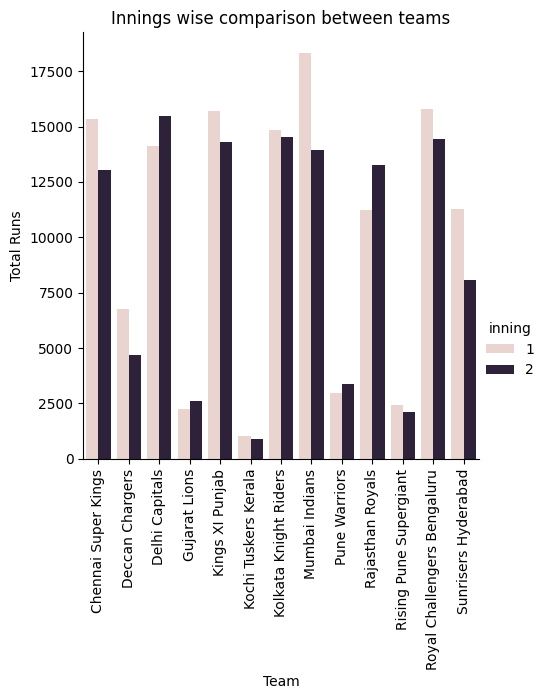

In [183]:
sns.catplot(x="batting_team", y="total_runs", hue = "inning", kind = "bar", data=df_innings_comp)
plt.xticks(rotation=90)
plt.xlabel('Team')
plt.ylabel('Total Runs')
plt.title('Innings wise comparison between teams')
plt.show()

### INFERENCE:

Out of the 13 Teams played from 2008 till 2020, 9 teams scored better runs in the First Innings and only 4 teams scored better runs in Second Innings.


## Q16 - Which team has scored the most number of 200+ scores?

In [184]:
cleaned_b.head(2)

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team,season
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,no_dismissal,no_player_dismissed,no_fielder,no_extras_type,Kolkata Knight Riders,Royal Challengers Bengaluru,2008
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,no_dismissal,no_player_dismissed,no_fielder,no_extras_type,Kolkata Knight Riders,Royal Challengers Bengaluru,2008


In [185]:
df_match_team_runs = cleaned_b.groupby(['id','batting_team'])['total_runs'].sum().reset_index()

In [186]:
df_match_team_runs

,id,batting_team,total_runs
0,335982,Kolkata Knight Riders,222
1,335982,Royal Challengers Bengaluru,82
2,335983,Chennai Super Kings,240
3,335983,Kings XI Punjab,207
4,335984,Delhi Capitals,132
...,...,...,...
1625,1237178,Sunrisers Hyderabad,132
1626,1237180,Delhi Capitals,189
1627,1237180,Sunrisers Hyderabad,172
1628,1237181,Delhi Capitals,156


In [187]:
df_match_team_runs_200 = df_match_team_runs[df_match_team_runs['total_runs']>=200]
df_match_team_runs_200

,id,batting_team,total_runs
0,335982,Kolkata Knight Riders,222
2,335983,Chennai Super Kings,240
3,335983,Kings XI Punjab,207
14,335989,Chennai Super Kings,208
15,335989,Mumbai Indians,202
...,...,...,...
1602,1216538,Mumbai Indians,208
1611,1216542,Sunrisers Hyderabad,201
1620,1216547,Mumbai Indians,201
1621,1216547,Royal Challengers Bengaluru,201


In [188]:
df_match_team_runs_200['batting_team'].value_counts()

batting_team
Royal Challengers Bengaluru    19
Chennai Super Kings            17
Kings XI Punjab                14
Mumbai Indians                 14
Kolkata Knight Riders          12
Sunrisers Hyderabad            12
Rajasthan Royals                9
Delhi Capitals                  7
Deccan Chargers                 1
Gujarat Lions                   1
Name: count, dtype: int64

<Axes: title={'center': 'Team who scored the most 200+ scores'}, ylabel='batting_team'>

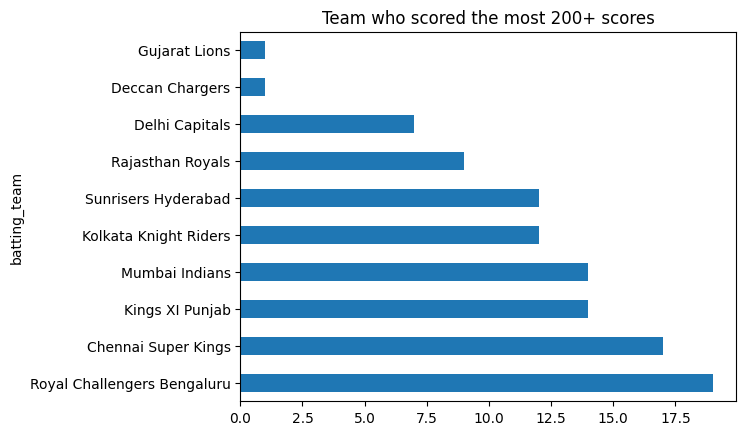

In [189]:
df_match_team_runs_200['batting_team'].value_counts().plot(kind='barh',title='Team who scored the most 200+ scores')

### INFERENCE:

Team Royal Challengers Bengaluru scored the most number of 200+ scores.

## Q17 - Which team has conceded 200+ scores the most?

In [190]:
df_match_conceded_runs = cleaned_b.groupby(['id','bowling_team'])['total_runs'].sum().reset_index()
df_match_conceded_runs

,id,bowling_team,total_runs
0,335982,Kolkata Knight Riders,82
1,335982,Royal Challengers Bengaluru,222
2,335983,Chennai Super Kings,207
3,335983,Kings XI Punjab,240
4,335984,Delhi Capitals,129
...,...,...,...
1625,1237178,Sunrisers Hyderabad,131
1626,1237180,Delhi Capitals,172
1627,1237180,Sunrisers Hyderabad,189
1628,1237181,Delhi Capitals,157


In [191]:
df_match_conceded_runs_200 = df_match_conceded_runs[df_match_conceded_runs['total_runs']>=200]
df_match_conceded_runs_200

,id,bowling_team,total_runs
1,335982,Royal Challengers Bengaluru,222
2,335983,Chennai Super Kings,207
3,335983,Kings XI Punjab,240
14,335989,Chennai Super Kings,202
15,335989,Mumbai Indians,208
...,...,...,...
1603,1216538,Sunrisers Hyderabad,208
1610,1216542,Kings XI Punjab,201
1620,1216547,Mumbai Indians,201
1621,1216547,Royal Challengers Bengaluru,201


In [192]:
df_match_conceded_runs_200['bowling_team'].value_counts()

bowling_team
Kings XI Punjab                20
Royal Challengers Bengaluru    17
Delhi Capitals                 14
Chennai Super Kings            12
Rajasthan Royals               11
Kolkata Knight Riders          10
Mumbai Indians                  8
Sunrisers Hyderabad             7
Gujarat Lions                   3
Deccan Chargers                 2
Pune Warriors                   1
Rising Pune Supergiant          1
Name: count, dtype: int64

<Axes: title={'center': 'Team who conceeded 200+ score the most'}, ylabel='bowling_team'>

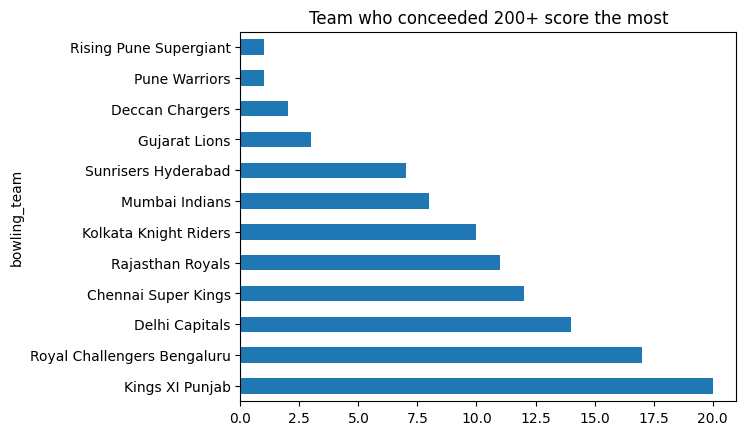

In [193]:
df_match_conceded_runs_200['bowling_team'].value_counts().plot(kind='barh',title='Team who conceeded 200+ score the most')

### INFERENCE:

Kings XI Punjab has conceded 200+ scores the most.

## Q18 - What was the highest run scored by a team in a single match?

In [194]:
df_match_team_score = cleaned_b.groupby(['id','batting_team'])['total_runs'].sum().reset_index()
df_match_team_score

,id,batting_team,total_runs
0,335982,Kolkata Knight Riders,222
1,335982,Royal Challengers Bengaluru,82
2,335983,Chennai Super Kings,240
3,335983,Kings XI Punjab,207
4,335984,Delhi Capitals,132
...,...,...,...
1625,1237178,Sunrisers Hyderabad,132
1626,1237180,Delhi Capitals,189
1627,1237180,Sunrisers Hyderabad,172
1628,1237181,Delhi Capitals,156


In [195]:
df_match_team_score['total_runs'].describe()

count    1630.000000
mean      155.087730
std        31.295581
min         2.000000
25%       136.000000
50%       157.000000
75%       176.000000
max       263.000000
Name: total_runs, dtype: float64

In [196]:
df_match_team_score.sort_values(by='total_runs', ascending = False, inplace=True)
df_top_5_scorers = df_match_team_score.head(5)

In [197]:
df_top_5_scorers

,id,batting_team,total_runs
702,598027,Royal Challengers Bengaluru,263
1119,980987,Royal Challengers Bengaluru,248
292,419137,Chennai Super Kings,246
1357,1136604,Kolkata Knight Riders,245
2,335983,Chennai Super Kings,240


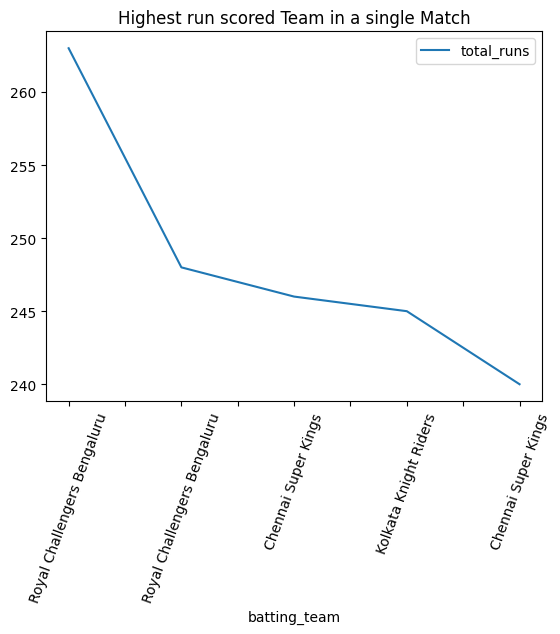

In [198]:
df_top_5_scorers.plot(x='batting_team', y='total_runs', title='Highest run scored Team in a single Match')
plt.xticks(rotation=70)
plt.show()

### INFERENCE:

Max value is 263 which means the heighest run scored by a team in a single match is 263.

Royal Challengers Bengaluru takes the first 2 positions followed by Chennai Super Kings and Kolkata Knight Riders.

## Q19 - Which is the biggest win in terms of run margin?

In [199]:
cleaned_m.head(2)

,id,city,date,season,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,toss_stat
0,335982,Bengaluru,2008-04-18,2008,BB McCullum,M.Chinnaswamy Stadium,0,Royal Challengers Bengaluru,Kolkata Knight Riders,Royal Challengers Bengaluru,field,Kolkata Knight Riders,runs,140.0,N,no_method,Asad Rauf,RE Koertzen,0
1,335983,Chandigarh,2008-04-19,2008,MEK Hussey,"Punjab Cricket Association IS Bindra Stadium, ...",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,no_method,MR Benson,SL Shastri,1


In [200]:
cleaned_m['result_margin'].max()

146.0

In [247]:
cleaned_m[cleaned_m['result_margin']==146]

,id,city,date,season,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,toss_stat
620,1082635,Delhi,2017-05-06,2017,LMP Simmons,Feroz Shah Kotla,0,Delhi Capitals,Mumbai Indians,Delhi Capitals,field,Mumbai Indians,runs,146.0,N,no_method,Nitin Menon,CK Nandan,0


### INFERENCE:

The biggest win in terms of run margin is of 146.

The match belongs to season 2017 and played between Delhi Capitals and Mumbai Indians.

Mumbai Indians won though they were not the toss winners.

## Q20 - Which batsmen have played the most number of balls?

In [201]:
cleaned_b.head(2)

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team,season
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,no_dismissal,no_player_dismissed,no_fielder,no_extras_type,Kolkata Knight Riders,Royal Challengers Bengaluru,2008
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,no_dismissal,no_player_dismissed,no_fielder,no_extras_type,Kolkata Knight Riders,Royal Challengers Bengaluru,2008


In [202]:
df_batsmen_ball_count = cleaned_b.groupby('batsman')['ball'].count().reset_index().sort_values(by='ball',ascending=False)
df_batsmen_ball_count

,batsman,ball
505,V Kohli,4609
407,S Dhawan,4208
379,RG Sharma,4088
438,SK Raina,4041
116,DA Warner,3819
...,...,...
411,S Kaushik,1
506,V Pratap Singh,1
204,JL Denly,1
469,Shahbaz Ahmed,1


In [203]:
df_top_5_scorers = df_batsmen_ball_count.head(5)

<Axes: title={'center': 'Batsmen who played the most balls'}, xlabel='batsman'>

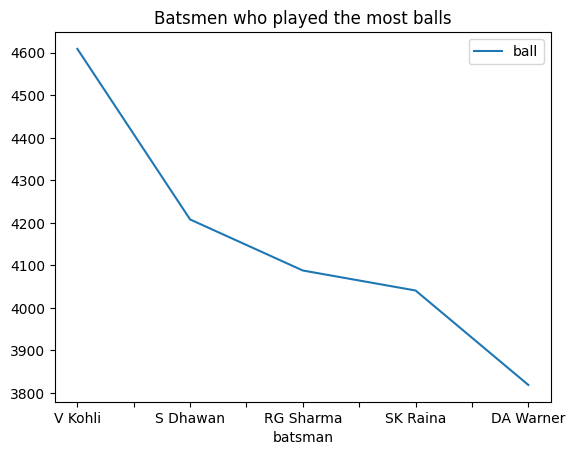

In [204]:
df_top_5_scorers.plot(x='batsman', y='ball', title='Batsmen who played the most balls')


### INFERENCE:

Batsmen who played most numbers of balls are V Kohli, S Dhawan, RG Sharma and SK Raina.

## Q22 - Who has hit the most number of 4's?

In [205]:
cleaned_b.head(3)

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team,season
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,no_dismissal,no_player_dismissed,no_fielder,no_extras_type,Kolkata Knight Riders,Royal Challengers Bengaluru,2008
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,no_dismissal,no_player_dismissed,no_fielder,no_extras_type,Kolkata Knight Riders,Royal Challengers Bengaluru,2008
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,no_dismissal,no_player_dismissed,no_fielder,no_extras_type,Kolkata Knight Riders,Royal Challengers Bengaluru,2008


In [206]:
cleaned_b[cleaned_b['non_boundary']==1].shape

(16, 19)

### INFERENCE_1:
The column 'non_boundary' cannot be used to answer this EDA question as it says only 16 balls were hit as a boundary.

Hence lets use the 'batsman_runs' column.

In [207]:
cleaned_b[cleaned_b['batsman_runs']==4]['batsman'].value_counts()

batsman
S Dhawan        591
DA Warner       510
V Kohli         504
SK Raina        493
G Gambhir       492
               ... 
A Choudhary       1
DM Bravo          1
Basil Thampi      1
DE Bollinger      1
Ravi Bishnoi      1
Name: count, Length: 424, dtype: int64

### INFERENCE:

S Dhawan hit the most number of 4's

## Q28 - What is the count of fours hit in each season?

In [208]:
df_season_4s_count = cleaned_b[cleaned_b['batsman_runs']==4].groupby('season')['batsman_runs'].count().reset_index()
df_season_4s_count.rename(columns={'batsman_runs':'count_of_4s'}, inplace=True)
df_season_4s_count

,season,count_of_4s
0,2008,1703
1,2009,1317
2,2010,1708
3,2011,1916
4,2012,1911
5,2013,2052
6,2014,1562
7,2015,1607
8,2016,1633
9,2017,1611


<Axes: title={'center': 'Fours hit in each Season '}, xlabel='season'>

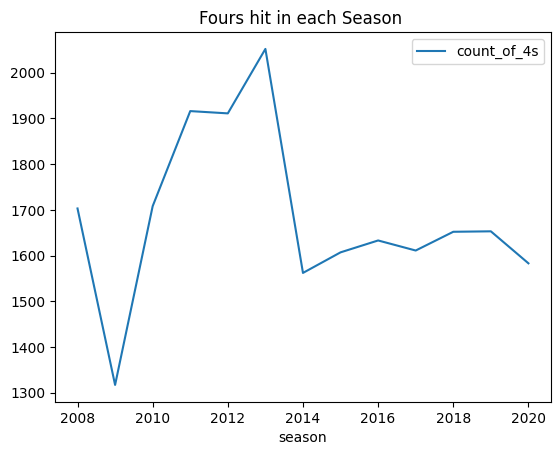

In [209]:
df_season_4s_count.plot(x='season', y='count_of_4s' ,title='Fours hit in each Season ')


### INFERENCE:

Maximum number of 4's were hit in 2013 season.

## Q29 - What is the count of sixes hit in each season?

In [244]:
df_season_sixes = cleaned_b[cleaned_b['batsman_runs']==6].groupby('season')['batsman_runs'].count().reset_index()
df_season_sixes.rename(columns={'batsman_runs':'count_of_6s'},inplace=True)
df_season_sixes

,season,count_of_6s
0,2008,623
1,2009,506
2,2010,585
3,2011,639
4,2012,733
5,2013,675
6,2014,714
7,2015,692
8,2016,639
9,2017,705


<Axes: title={'center': 'Sixes hit in each Season '}, xlabel='season'>

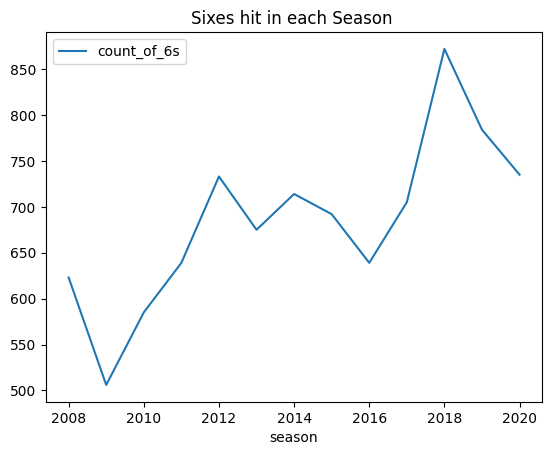

In [245]:
df_season_sixes.plot(x='season', y='count_of_6s' ,title='Sixes hit in each Season ')


### INFERENCE:

Season 2018 withnessed the heighest number of sixes.

## Q30 - What is the count of runs scored from boundaries in each season?

In [210]:
df_season_4s_runs = cleaned_b[cleaned_b['batsman_runs']==4].groupby('season')['batsman_runs'].sum().reset_index()
df_season_4s_runs.rename(columns={'batsman_runs':'runs_from_4s'},inplace=True)
df_season_4s_runs

,season,runs_from_4s
0,2008,6812
1,2009,5268
2,2010,6832
3,2011,7664
4,2012,7644
5,2013,8208
6,2014,6248
7,2015,6428
8,2016,6532
9,2017,6444


<Axes: title={'center': 'Runs scored from Boundaries for each Season'}, xlabel='season'>

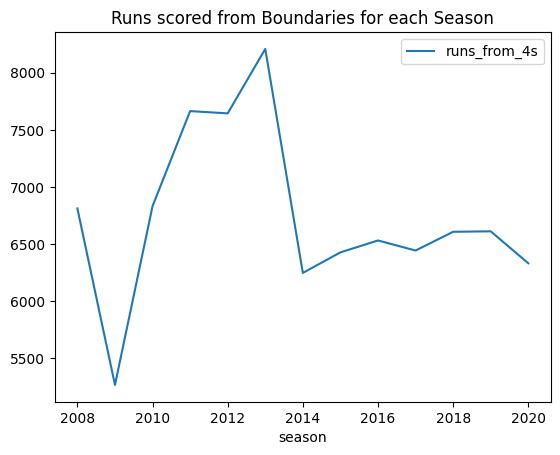

In [211]:
df_season_4s_runs.plot(x='season',y='runs_from_4s',title='Runs scored from Boundaries for each Season')

### INFERENCE:

Runs scored from 4s were the heighest in the season 2013.

## Q31 - What is the run contribution from boundaries in each season?

In [212]:
df_boundaries = pd.merge(df_season_4s_count,df_season_4s_runs)
df_boundaries

,season,count_of_4s,runs_from_4s
0,2008,1703,6812
1,2009,1317,5268
2,2010,1708,6832
3,2011,1916,7664
4,2012,1911,7644
5,2013,2052,8208
6,2014,1562,6248
7,2015,1607,6428
8,2016,1633,6532
9,2017,1611,6444


In [213]:
grp_season_total_runs = cleaned_b.groupby('season')['total_runs'].sum()
grp_season_total_runs

season
2008    17937
2009    16320
2010    18863
2011    21154
2012    22453
2013    22541
2014    18909
2015    18332
2016    18862
2017    18769
2018    19901
2019    19400
2020    19352
Name: total_runs, dtype: int64

In [214]:
df_boundaries = pd.merge(df_boundaries,grp_season_total_runs.reset_index())

In [215]:
df_boundaries

,season,count_of_4s,runs_from_4s,total_runs
0,2008,1703,6812,17937
1,2009,1317,5268,16320
2,2010,1708,6832,18863
3,2011,1916,7664,21154
4,2012,1911,7644,22453
5,2013,2052,8208,22541
6,2014,1562,6248,18909
7,2015,1607,6428,18332
8,2016,1633,6532,18862
9,2017,1611,6444,18769


In [216]:
df_boundaries['run_contibution_from_4s'] = 0.0
df_boundaries['run_contibution_from_4s'] = (df_boundaries['runs_from_4s']/df_boundaries['total_runs'])*100

In [217]:
df_boundaries

,season,count_of_4s,runs_from_4s,total_runs,run_contibution_from_4s
0,2008,1703,6812,17937,37.977365
1,2009,1317,5268,16320,32.279412
2,2010,1708,6832,18863,36.219053
3,2011,1916,7664,21154,36.229555
4,2012,1911,7644,22453,34.044448
5,2013,2052,8208,22541,36.413646
6,2014,1562,6248,18909,33.042467
7,2015,1607,6428,18332,35.064368
8,2016,1633,6532,18862,34.630474
9,2017,1611,6444,18769,34.333209


<Axes: title={'center': 'Run contribution from boundaries in each Season'}, xlabel='season'>

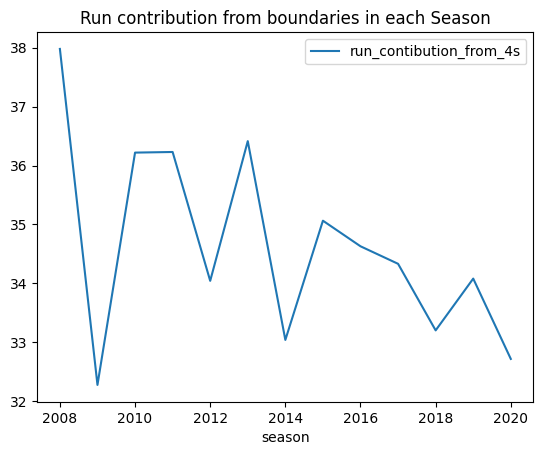

In [218]:
df_boundaries.plot(x='season',y='run_contibution_from_4s',title='Run contribution from boundaries in each Season')

### INFERENCE:

Run contribution from 4s (Boundaries) was the maximum in 2008 Season.

## Q23 - Who has hit the most number of 6's?

In [219]:
cleaned_b[cleaned_b['batsman_runs']==6]['batsman'].value_counts()

batsman
CH Gayle          349
AB de Villiers    235
MS Dhoni          216
RG Sharma         214
V Kohli           202
                 ... 
CK Langeveldt       1
A Mithun            1
WD Parnell          1
BJ Haddin           1
AT Carey            1
Name: count, Length: 351, dtype: int64

### INFERENCE:

CH Gayle hit the most number of 6's

## Q24 - Who has the highest strike rate?

In [220]:
cleaned_b.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team,season
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,no_dismissal,no_player_dismissed,no_fielder,no_extras_type,Kolkata Knight Riders,Royal Challengers Bengaluru,2008
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,no_dismissal,no_player_dismissed,no_fielder,no_extras_type,Kolkata Knight Riders,Royal Challengers Bengaluru,2008
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,no_dismissal,no_player_dismissed,no_fielder,no_extras_type,Kolkata Knight Riders,Royal Challengers Bengaluru,2008
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,no_dismissal,no_player_dismissed,no_fielder,no_extras_type,Kolkata Knight Riders,Royal Challengers Bengaluru,2008
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,no_dismissal,no_player_dismissed,no_fielder,no_extras_type,Kolkata Knight Riders,Royal Challengers Bengaluru,2008


In [221]:
#strike rate is calculated by dividing the number of runs scored by the number of balls
#faced, and then multiplying by 100
df_batsman_runs = cleaned_b.groupby('batsman')['batsman_runs'].sum().reset_index()
df_batsman_runs

,batsman,batsman_runs
0,A Ashish Reddy,280
1,A Chandila,4
2,A Chopra,53
3,A Choudhary,25
4,A Dananjaya,4
...,...,...
532,YV Takawale,192
533,Yashpal Singh,47
534,Younis Khan,3
535,Yuvraj Singh,2750


In [222]:
df_batsman_balls = cleaned_b.groupby('batsman')['ball'].count().reset_index()
df_batsman_balls

,batsman,ball
0,A Ashish Reddy,196
1,A Chandila,7
2,A Chopra,75
3,A Choudhary,20
4,A Dananjaya,5
...,...,...
532,YV Takawale,183
533,Yashpal Singh,67
534,Younis Khan,7
535,Yuvraj Singh,2205


In [223]:
df_batsman_strike_rate = pd.merge(df_batsman_runs,df_batsman_balls)
df_batsman_strike_rate

,batsman,batsman_runs,ball
0,A Ashish Reddy,280,196
1,A Chandila,4,7
2,A Chopra,53,75
3,A Choudhary,25,20
4,A Dananjaya,4,5
...,...,...,...
532,YV Takawale,192,183
533,Yashpal Singh,47,67
534,Younis Khan,3,7
535,Yuvraj Singh,2750,2205


In [224]:
df_batsman_strike_rate['strike_rate'] = 0.0
df_batsman_strike_rate['strike_rate'] = (df_batsman_strike_rate['batsman_runs']/df_batsman_strike_rate['ball'])*100

In [225]:
df_batsman_strike_rate.sort_values(by='strike_rate', ascending=False)

,batsman,batsman_runs,ball,strike_rate
72,B Stanlake,5,2,250.000000
504,Umar Gul,39,19,205.263158
395,RS Sodhi,4,2,200.000000
470,Shahid Afridi,81,46,176.086957
175,I Malhotra,7,4,175.000000
...,...,...,...,...
479,Sunny Gupta,0,1,0.000000
91,C Nanda,0,1,0.000000
499,U Kaul,0,1,0.000000
64,Arshdeep Singh,0,3,0.000000


In [226]:
#Curious to know the strike rate of V Kohli
df_batsman_strike_rate[df_batsman_strike_rate['batsman']=='V Kohli']

,batsman,batsman_runs,ball,strike_rate
505,V Kohli,5878,4609,127.533087


### INFERENCE:

B Stanlake is having the heighest strike rate.

## Q26 - Which stadium has hosted the most number of matches?

In [227]:
cleaned_m.head(2)

,id,city,date,season,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,toss_stat
0,335982,Bengaluru,2008-04-18,2008,BB McCullum,M.Chinnaswamy Stadium,0,Royal Challengers Bengaluru,Kolkata Knight Riders,Royal Challengers Bengaluru,field,Kolkata Knight Riders,runs,140.0,N,no_method,Asad Rauf,RE Koertzen,0
1,335983,Chandigarh,2008-04-19,2008,MEK Hussey,"Punjab Cricket Association IS Bindra Stadium, ...",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,no_method,MR Benson,SL Shastri,1


In [228]:
cleaned_m.groupby('venue')['id'].count().reset_index().sort_values(by='id',ascending=False).head(3)

,venue,id
14,M.Chinnaswamy Stadium,80
7,Eden Gardens,77
8,Feroz Shah Kotla,74


### INFERENCE:

M.Chinnaswamy Stadium hosted the most number of matches.

## *Player Statistics*

In [229]:
cleaned_m.head()

,id,city,date,season,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,toss_stat
0,335982,Bengaluru,2008-04-18,2008,BB McCullum,M.Chinnaswamy Stadium,0,Royal Challengers Bengaluru,Kolkata Knight Riders,Royal Challengers Bengaluru,field,Kolkata Knight Riders,runs,140.0,N,no_method,Asad Rauf,RE Koertzen,0
1,335983,Chandigarh,2008-04-19,2008,MEK Hussey,"Punjab Cricket Association IS Bindra Stadium, ...",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,no_method,MR Benson,SL Shastri,1
2,335984,Delhi,2008-04-19,2008,MF Maharoof,Feroz Shah Kotla,0,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,wickets,9.0,N,no_method,Aleem Dar,GA Pratapkumar,0
3,335985,Mumbai,2008-04-20,2008,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bengaluru,Mumbai Indians,bat,Royal Challengers Bengaluru,wickets,5.0,N,no_method,SJ Davis,DJ Harper,0
4,335986,Kolkata,2008-04-20,2008,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,no_method,BF Bowden,K Hariharan,0


## Q27 - Who has won the most MOM awards?

In [246]:
cleaned_m['player_of_match'].describe()

count                816
unique               234
top       AB de Villiers
freq                  23
Name: player_of_match, dtype: object

### INFERENCE:

AB de Villiers was the Player of Match for 23 matches which is a personal achievement.

## Lets see who were the players to get the MOM title the most for each season.

In [248]:
print('Player who became player_of_match the most for each SEASON')
for i in season_t:
  season_player_of_match_series = cleaned_m[cleaned_m['season']==i]['player_of_match'].value_counts().sort_values(ascending=False)
  print('\n----------------')
  print('Season: ',i)
  print('----------------')
  season_player_of_match_df = season_player_of_match_series.to_frame().reset_index()
  player_of_match_count = season_player_of_match_df['count'].max()
  match_str = 'Matches' if player_of_match_count > 1 else 'Match'
  player_list = season_player_of_match_df[season_player_of_match_df['count']==player_of_match_count]['player_of_match']
  for n, val in enumerate(sorted(list(player_list))):
    n += 1
    #print (n, ". ",val," (",player_of_match_count," ",match_str,")")
    print("% s. % s (% s % s)" % (n,val,player_of_match_count,match_str))


Player who became player_of_match the most for each SEASON

----------------
Season:  2008
----------------
1. SE Marsh (5 Matches)

----------------
Season:  2009
----------------
1. YK Pathan (3 Matches)

----------------
Season:  2010
----------------
1. SR Tendulkar (4 Matches)

----------------
Season:  2011
----------------
1. CH Gayle (6 Matches)

----------------
Season:  2012
----------------
1. CH Gayle (5 Matches)

----------------
Season:  2013
----------------
1. MEK Hussey (5 Matches)

----------------
Season:  2014
----------------
1. GJ Maxwell (4 Matches)

----------------
Season:  2015
----------------
1. DA Warner (4 Matches)

----------------
Season:  2016
----------------
1. V Kohli (5 Matches)

----------------
Season:  2017
----------------
1. BA Stokes (3 Matches)
2. NM Coulter-Nile (3 Matches)

----------------
Season:  2018
----------------
1. Rashid Khan (4 Matches)

----------------
Season:  2019
----------------
1. AD Russell (4 Matches)

----------------
S

## Q21 - Who are the leading run-scorers of all time?

In [232]:
cleaned_b.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team,season
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,no_dismissal,no_player_dismissed,no_fielder,no_extras_type,Kolkata Knight Riders,Royal Challengers Bengaluru,2008
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,no_dismissal,no_player_dismissed,no_fielder,no_extras_type,Kolkata Knight Riders,Royal Challengers Bengaluru,2008
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,no_dismissal,no_player_dismissed,no_fielder,no_extras_type,Kolkata Knight Riders,Royal Challengers Bengaluru,2008
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,no_dismissal,no_player_dismissed,no_fielder,no_extras_type,Kolkata Knight Riders,Royal Challengers Bengaluru,2008
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,no_dismissal,no_player_dismissed,no_fielder,no_extras_type,Kolkata Knight Riders,Royal Challengers Bengaluru,2008


**Lets check which BATSMAN has got the heighest personal RUNS over the entire seasons**

In [233]:
cleaned_b.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False)

batsman
V Kohli           5878
SK Raina          5368
DA Warner         5254
RG Sharma         5230
S Dhawan          5197
                  ... 
IC Pandey            0
S Kaushik            0
ND Doshi             0
V Pratap Singh       0
Abdur Razzak         0
Name: batsman_runs, Length: 537, dtype: int64

### INFERENCE:

V Kohli has the heighest personal batting score over the entire 13 seasons, followed by SK Raina, DA Warner and RG Sharma.



## Lets check the batting score of batsman per season, who scored the heighest in each season.

In [234]:
#Create a grouped DataFrame summing up the runs each of the batsman scored in
#each season (ie groupby season and batsman)
#reset_index() is used to consider the index values of the groupby result to
#be columns while converting to dataframe
df_grouped = cleaned_b.groupby(['season','batsman'])['batsman_runs'].sum().reset_index()
df_grouped

,season,batsman,batsman_runs
0,2008,A Chopra,42
1,2008,A Kumble,13
2,2008,A Mishra,37
3,2008,A Mukund,0
4,2008,A Nehra,3
...,...,...,...
1941,2020,VR Aaron,1
1942,2020,WP Saha,214
1943,2020,Washington Sundar,111
1944,2020,YBK Jaiswal,40


In [235]:
#Now sort the grouped by DataFrame keeping the grouping of Season but sorting on the runs
#reset_index(drop = True) tells to drop the existing index and create new index while
#converting to grouped dataframe
df_grouped_sorted = df_grouped.groupby(['season']).apply(
      lambda x: x.sort_values(['batsman_runs'],ascending = False)
      ).reset_index(drop = True)
df_grouped_sorted

,season,batsman,batsman_runs
0,2008,SE Marsh,616
1,2008,G Gambhir,534
2,2008,ST Jayasuriya,514
3,2008,SR Watson,472
4,2008,GC Smith,441
...,...,...,...
1941,2020,SS Cottrell,0
1942,2020,B Kumar,0
1943,2020,Arshdeep Singh,0
1944,2020,SP Goswami,0


In [236]:
#Now get only the first row from each group (seaon), which will be the top scorer batsman
#of that season
df_final = df_grouped_sorted.groupby(['season']).head(1)


In [237]:
#Display the top scoring batsman of each season
df_final

,season,batsman,batsman_runs
0,2008,SE Marsh,616
154,2009,ML Hayden,572
304,2010,SR Tendulkar,617
468,2011,CH Gayle,608
648,2012,CH Gayle,733
818,2013,MEK Hussey,733
990,2014,RV Uthappa,660
1123,2015,DA Warner,562
1252,2016,V Kohli,973
1388,2017,DA Warner,641


### INFERENCE

Above list show the top run scorers of each season.

**Now lets look at the Bowlers who took the most of the wickets during the entire season and season wise.**

## Q25 - Who is the leading wicket-taker?

In [238]:
cleaned_b.groupby('bowler')['is_wicket'].sum().sort_values(ascending=False)

bowler
SL Malinga         188
DJ Bravo           175
A Mishra           169
PP Chawla          164
Harbhajan Singh    161
                  ... 
RR Bose              0
RR Bhatkal           0
RA Tripathi          0
RA Shaikh            0
LS Livingstone       0
Name: is_wicket, Length: 420, dtype: int64

### INFERENCE:

SL Malings was the top bowler across the entire seasons who took the most wickets (188 wickets).

**Now lets check the top bowlers acrtoss each season.**

## Leading wicket-taker of each Season

In [239]:
df_grouped_bowler = cleaned_b.groupby(['season','bowler'])['is_wicket'].sum().reset_index()
df_grouped_bowler

,season,bowler,is_wicket
0,2008,A Kumble,8
1,2008,A Mishra,11
2,2008,A Nehra,14
3,2008,A Nel,1
4,2008,A Symonds,0
...,...,...,...
1434,2020,UT Yadav,1
1435,2020,V Shankar,4
1436,2020,VR Aaron,0
1437,2020,Washington Sundar,9


In [240]:
df_grouped_bowler.rename(columns={'is_wicket': 'wicket_count'}, inplace=True)

In [241]:
df_grouped_bowler_sorted = df_grouped_bowler.groupby(['season']).apply(
      lambda x: x.sort_values(['wicket_count'],ascending = False)
      ).reset_index(drop = True)

In [242]:
df_grouped_bowler_sorted

,season,bowler,wicket_count
0,2008,Sohail Tanvir,24
1,2008,IK Pathan,20
2,2008,SR Watson,20
3,2008,SK Warne,20
4,2008,JA Morkel,20
...,...,...,...
1434,2020,DR Sams,0
1435,2020,DS Kulkarni,0
1436,2020,MR Marsh,0
1437,2020,R Parag,0


In [217]:
df_season_bowler = df_grouped_bowler_sorted.groupby('season').head(1)
df_season_bowler

,season,bowler,wicket_count
0,2008,Sohail Tanvir,24
98,2009,RP Singh,26
210,2010,PP Ojha,22
333,2011,SL Malinga,30
467,2012,M Morkel,30
596,2013,DJ Bravo,34
728,2014,MM Sharma,26
829,2015,DJ Bravo,28
928,2016,B Kumar,24
1035,2017,B Kumar,28


### INFERENCE

Above list show the top wicket taking bowlers of each season.

## Q32 - Which team has scored the most runs in the first 6 over

In [277]:
cleaned_b.head(2)

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team,season
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,no_dismissal,no_player_dismissed,no_fielder,no_extras_type,Kolkata Knight Riders,Royal Challengers Bengaluru,2008
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,no_dismissal,no_player_dismissed,no_fielder,no_extras_type,Kolkata Knight Riders,Royal Challengers Bengaluru,2008


In [286]:
#over values are from 0 to 19, so first 6 overs are 0 to 5
df_first_six_overs = cleaned_b[cleaned_b['over']<=5].groupby(['id','inning','batting_team'])['total_runs'].sum().reset_index().sort_values(by='total_runs',ascending=False)
df_first_six_overs

,id,inning,batting_team,total_runs
1241,1082636,2,Kolkata Knight Riders,105
912,734047,2,Chennai Super Kings,100
940,829729,2,Chennai Super Kings,90
469,501258,2,Kochi Tuskers Kerala,87
872,734007,2,Kings XI Punjab,86
...,...,...,...,...
1008,829801,1,Chennai Super Kings,16
1391,1175356,2,Chennai Super Kings,16
442,501245,1,Chennai Super Kings,15
119,392182,2,Rajasthan Royals,14


### INFERENCE:

Kolkata Knight Riders scored the most runs in the first 6 overs (105 runs)

## Q33 - Which team has scored the most runs in the last 4 overs?

In [287]:
#over values are from 0 to 19, so last 4 overs are from 16 to 19
df_last_four_overs = cleaned_b[cleaned_b['over']>=16].groupby(['id','inning','batting_team'])['total_runs'].sum().reset_index().sort_values(by='total_runs',ascending=False)
df_last_four_overs

,id,inning,batting_team,total_runs
1035,980987,1,Royal Challengers Bengaluru,89
1505,1216547,2,Mumbai Indians,79
698,598054,1,Royal Challengers Bengaluru,77
1077,1082599,1,Delhi Capitals,76
1215,1136586,1,Delhi Capitals,76
...,...,...,...,...
1078,1082599,2,Rising Pune Supergiant,0
1022,980973,2,Mumbai Indians,0
47,336008,1,Rajasthan Royals,0
220,419114,2,Delhi Capitals,0


### INFERENCE:

Royal Challengers Bengaluru scored the most runs in the last 4 overs.

## Q34 - Which team has the best scoring run-rate in the first 6 overs?

In [288]:
df_first_six_overs['run_rate'] = 0.0
df_first_six_overs['run_rate'] = df_first_six_overs['total_runs']/6

In [290]:
df_first_six_overs.sort_values(by='run_rate', ascending=False)

,id,inning,batting_team,total_runs,run_rate
1241,1082636,2,Kolkata Knight Riders,105,17.500000
912,734047,2,Chennai Super Kings,100,16.666667
940,829729,2,Chennai Super Kings,90,15.000000
469,501258,2,Kochi Tuskers Kerala,87,14.500000
872,734007,2,Kings XI Punjab,86,14.333333
...,...,...,...,...,...
1008,829801,1,Chennai Super Kings,16,2.666667
1391,1175356,2,Chennai Super Kings,16,2.666667
442,501245,1,Chennai Super Kings,15,2.500000
119,392182,2,Rajasthan Royals,14,2.333333


### INFERENCE:

Kolkata Knight Riders had the best scoring run-rate in the first 6 overs.

## Q35 - Which team has the best scoring run-rate in the last 4 overs?

In [291]:
df_last_four_overs['run_rate'] = 0.0
df_last_four_overs['run_rate'] = df_last_four_overs['total_runs']/4

In [293]:
df_last_four_overs.sort_values(by='run_rate', ascending=False)

,id,inning,batting_team,total_runs,run_rate
1035,980987,1,Royal Challengers Bengaluru,89,22.25
1505,1216547,2,Mumbai Indians,79,19.75
698,598054,1,Royal Challengers Bengaluru,77,19.25
1077,1082599,1,Delhi Capitals,76,19.00
1215,1136586,1,Delhi Capitals,76,19.00
...,...,...,...,...,...
1078,1082599,2,Rising Pune Supergiant,0,0.00
1022,980973,2,Mumbai Indians,0,0.00
47,336008,1,Rajasthan Royals,0,0.00
220,419114,2,Delhi Capitals,0,0.00


### INFERENCE:

Royal Challengers Bengaluru had the best scoring run-rate in the last 4 overs.

# Conclusion

The IPL seasons played from 2008 to 2020 had **13 participating teams** whose presence varied across the seasons.

Over the course of time, **the teams, cities and stadiums had name changes** which had to be taken care while preprocessing.

The deliveries dataset has the **column 'non_boundary' which can be ignored as the column is not capturing the boundaries appropriatly**.

**There are cases of additional ball being thrown at overs without the occurance of a wide or no-ball.**

**Winning the Toss always gave an edge to the toss winners on winning the match. This was because the toss decision had the impact on winning the game.**

Note:
The order of EDA questions from 1 to 35 can be seen altered many places as I have done initial analysis and later EDA questions where plugged in to those portions.